In [320]:
### Summarise colocalization results from OTAR for co-eQTLs

# Libraries

In [321]:
source('MS0_Libraries.r')

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
"incomplete final line found by readTableHeader on '../conda_environment/Environment_Configs.csv'"


[1] "/home/icb/corinna.losert/miniconda3/envs/scgrn_R_4_1//lib/R/library"


In [322]:
library(gwasrapidd)

In [323]:
source('MS4_Plot_Config.r')

In [324]:
packageVersion("gwasrapidd")

[1] '0.99.17'

# Parameters

In [325]:
dataset = 'oneK1K'

In [326]:
data_path = '../data/current/coeqtl_mapping/'

In [327]:
data_path_eqtl =  '../data/current/eqtl_mapping/'

In [328]:
coeqtl_results_path = 'co_qtls_decision_tree/'

In [329]:
result_path =  '../data/current//results/'

In [330]:
### Parameters with which coloc was run

In [331]:
filter_snps =   'y'    # define whether to match snps of eQTL and co-eQTL data; 
data_source = 'fm'  # use finemapped co-eQTL or full window scan

In [332]:
### Filters

In [333]:
only_dt = TRUE ## only decision tree genes

In [334]:
### Which set of significant co-eQTLs to load

In [335]:
### To this meta-dataset all the information should be joined

In [336]:
p_val_thres = ''  # '' in case of 0.05; numeric value otherwise

In [337]:
p_val_column = 'p_val_mt_eGene'  #p_val_mt_eGene; q_val

In [338]:
if(p_val_thres == ''){
sign_coeqtl_path = paste0(data_path, coeqtl_results_path,  "/shared_results/5DS_Meta_Analysis_Sign_coeQTLs133", p_val_column, "_.csv")
    }

In [339]:
file.info(sign_coeqtl_path )$ctime

[1] "2025-07-20 12:14:08 CEST"

In [340]:
### Define the threshold for colocalisation

In [341]:
coloc_thres =  'relation'   # 0.6 , #0.75 # relation

# Data 

## Load eQTL / co-eQTL colocalisation data

In [342]:
eqtl_coeqtl_coloc = fread(paste0(data_path, coeqtl_results_path, '/coloc_eqtl_coeqtl/','coloc_annot_all_cell_types.csv'))

In [343]:
head(eqtl_coeqtl_coloc,2)

V1,ct2,hit2,cell_type,ct1,hit1,nsnps,PP.H0.abf,PP.H1.abf,PP.H2.abf,PP.H3.abf,PP.H4.abf,idx1,idx2,coeQTL_gene_cs,SusieRss_CS_FM_eQTL,SusieRss_CS_FM_coeQTL
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<int>,<int>
1,A1BG_RPS26,12:56007301:G:A,CD8_T,RPS26,12:56007301:G:A,390,0.000000e+00,0.000000e+00,0.000000e+00,0.0000000,1.0000000,lbf_cs_1,lbf_cs_1,1,1,1
2,A2M-AS1_IL7R,12:8974903:C:CT,CD8_T,A2M-AS1,12:8908860:G:T,1042,3.554854e-21,5.293508e-05,9.856215e-18,0.1450584,0.8548887,lbf_cs_2,lbf_cs_1,-Inf,2,1


In [344]:
### Check the mapping

In [345]:
eqtl_coeqtl_coloc$idx1_t = str_replace(eqtl_coeqtl_coloc$idx1, 'lbf_cs_', '')
eqtl_coeqtl_coloc$idx2_t = str_replace(eqtl_coeqtl_coloc$idx2, 'lbf_cs_', '')

In [346]:
nrow(eqtl_coeqtl_coloc)

[1] 37057

In [347]:
nrow(eqtl_coeqtl_coloc[eqtl_coeqtl_coloc$idx1_t == eqtl_coeqtl_coloc$SusieRss_CS_FM_eQTL,])

[1] 36919

In [348]:
nrow(eqtl_coeqtl_coloc[eqtl_coeqtl_coloc$idx2_t == eqtl_coeqtl_coloc$SusieRss_CS_FM_coeQTL,])

[1] 35116

## Load data about Credible Sets per eGene

In [349]:
## Get the information from eQTL and co-EQTL finemapping whether a CS could be mapped

In [350]:
gene_pairs_cs = read.csv(paste0('../results/current/', '/F16/gene_pair_max_CS.csv'))

In [351]:
egene_cs = read.csv(paste0('../results/current/', '/F16/eGene_max_CS.csv'))

In [352]:
#head(gene_pairs_cs)

## MOTIFBREAKR Results

In [353]:
tf_binding_result = read.csv(paste0(result_path, '/F14/', 'F14_TF_Binding_Overlaps_MOTIF_REMAP.csv'))

In [354]:
head(tf_binding_result,2)

,X.1,feature_id,snp_id,cell_type,X,eGene,coeGene,eqtl_snp,type,chr,snp_pos,remap_overlap,motif_search_fm,motif_search,motif_breakr_fm,motif_breakr,SusieRss_CS_FM_coeQTL
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,A2M_BACH2,12:8938520:G:T,CD4_T,1,A2M,BACH2,1,joint,12,8938520,0,0,0,0,0,1
2,2,A2M_BACH2,12:8938597:CAA:C,CD4_T,2,A2M,BACH2,1,joint,12,8938597,0,0,0,0,0,1


In [355]:
## Filter on entries with motifbreakR hit

In [356]:
tf_binding_result = tf_binding_result[(tf_binding_result$motif_breakr_fm == 1) | (tf_binding_result$motif_breakr == 1),]

In [357]:
tf_binding_result[tf_binding_result$eGene == 'SUPT3H',]

,X.1,feature_id,snp_id,cell_type,X,eGene,coeGene,eqtl_snp,type,chr,snp_pos,remap_overlap,motif_search_fm,motif_search,motif_breakr_fm,motif_breakr,SusieRss_CS_FM_coeQTL
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2239,2239,BACH2_SUPT3H,6:45208851:GACCCTCTTGTTAGGGGCTCATGAGGCTGATGACTT:G,CD4_T,14246,SUPT3H,BACH2,1,joint,6,45208851,0,0,0,1,0,1
7439,7439,FOXP1_SUPT3H,6:45067699:A:T,CD4_T,14298,SUPT3H,FOXP1,1,joint,6,45067699,0,1,0,1,0,1
7476,7476,FOXP1_SUPT3H,6:45194422:T:C,CD4_T,14335,SUPT3H,FOXP1,1,joint,6,45194422,0,1,0,1,0,1


In [358]:
unique(tf_binding_result$SusieRss_CS_FM_coeQTL)

[1]  1 NA  2  3

## Information about eGenes passing Decision Tree Filter

In [359]:
cell_types = c( 'B', 'NK', 'Mono', 'CD8_T' , 'CD4_T')

In [360]:
gene_list = data.frame()

In [361]:
datasets_to_load = c('Franke_v2', 'Franke_v3', 'wijst', 'oneK1K', 'multiome')

In [362]:
for(j in datasets_to_load){
    for(i in cell_types){
        gene_list_input = fread(paste0(data_path, coeqtl_results_path , '/correlation_input/', 'F11_Decision_Tree_Geneswg3_',j,'_' , i, '.Qced.Normalized.SCs.Rds.tsv'), header = FALSE)
        gene_list_input$cell_type = i
        gene_list_input$dataset = j
        gene_list = rbind(gene_list, gene_list_input)
        }
    }

In [363]:
head(gene_list_input,2)

V1,cell_type,dataset
<chr>,<chr>,<chr>
A2M,CD4_T,multiome
A2M-AS1,CD4_T,multiome


In [364]:
### unique gene list per cell-type

In [365]:
 gene_list= unique( gene_list[,c('cell_type', 'V1')])

In [366]:
head( gene_list,2)

cell_type,V1
<chr>,<chr>
B,x
B,AC004687.1


In [367]:
colnames( gene_list) = c('cell_type', 'gene')

## Load significant co-eQTLs from meta-analysis

In [368]:
sign_coeqtls = read.csv(paste0(sign_coeqtl_path))

In [369]:
nrow(sign_coeqtls)

[1] 91628

In [370]:
sign_coeqtls = as.data.frame(sign_coeqtls)

In [371]:
head(sign_coeqtls,2)

,X,eGene,coeGene,snp_id,cell_type,feature_id,triplet,n_samples,p_value,z_score,⋯,eQTL_remap2022_1,eQTL_remap2022_2,eQTL_remap2022_3,eQTL_HPA,eQTL_MIRNA,eQTL_TF,coeGene_is_enriched_TF,cctqtl,simulation_score,ccInteraction
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<int>,<chr>,<dbl>,<int>
1,1,A2M,BACH2,12:8971336:T:C,CD4_T,A2M_BACH2,12:8971336:T:C;A2M_BACH2,977,2.687871e-11,-6.662730,⋯,NA,NA,NA,NA,NA,NA,NA,,0,0
2,2,A2M,BACH2,12:8992460:T:C,CD4_T,A2M_BACH2,12:8992460:T:C;A2M_BACH2,977,1.680350e-10,-6.388031,⋯,NA,NA,NA,NA,NA,NA,NA,,0,0


In [372]:
length(unique(sign_coeqtls$feature_id))

[1] 12502

In [373]:
### Extract the position from the SNP-ID

In [374]:
sign_coeqtls$pos = str_extract(sign_coeqtls$snp_id, ':\\d.*\\d:')
sign_coeqtls$pos = str_replace_all(sign_coeqtls$pos, ':', '')
#sign_coeqtls$pos = str_replace(sign_coeqtls$pos, '.*:', '')

In [375]:
### Apply blacklist or whitelist to sign coeqtls

In [376]:
filter = ''

In [377]:
nrow(sign_coeqtls)

[1] 91628

In [378]:
if(filter == 'blacklist'){
    sign_coeqtls = sign_coeqtls[sign_coeqtls$on_blacklist == 0,]
    }

In [379]:
nrow(sign_coeqtls)

[1] 91628

In [380]:
if(filter == 'whitelist'){
    sign_coeqtls = sign_coeqtls[sign_coeqtls$on_whitelist == 1,]
    }

In [381]:
nrow(sign_coeqtls)

[1] 91628

In [382]:
### Examples with motifbreakr hit and coloc

In [383]:
examples = unique(sign_coeqtls[(sign_coeqtls$motifbreakr_hit != '') & ((sign_coeqtls$eGene_coloc != '') | (sign_coeqtls$coeqtl_coloc != '')),c('eGene', 'cell_type', 'feature_id', 'motifbreakr_hit', 'eGene_coloc', 'coeqtl_coloc')]) %>% arrange(eGene, feature_id, cell_type)

In [384]:
#examples

In [385]:
write.csv(examples, 'examples/GWAS_coloc_motifbreakr_examples_all.csv')

## Get eQTL - SNPs pairs from sceQTLGen (input for co-eQTL mapping)

In [386]:
### get tested eGenes per cell-type to get background

In [387]:
snp_gene_mapping_all = data.frame()

In [388]:
cell_types = c('B', 'CD4_T', 'CD8_T', 'NK', 'Mono')

In [389]:
for(i in cell_types){
    print(file.info(paste0(data_path_eqtl, 'sc_eqtlgen_final/'  , i, '_snp_egene_mapping.csv'))$ctime)
    snp_gene_mapping = read.csv(paste0(data_path_eqtl, 'sc_eqtlgen_final/'  , i, '_snp_egene_mapping.csv'))
    snp_gene_mapping$cell_type = i
    
    snp_gene_mapping_all = rbind(snp_gene_mapping, snp_gene_mapping_all)
    }
    

[1] "2025-02-12 14:31:31 CET"
[1] "2024-12-11 09:52:00 CET"
[1] "2024-12-11 09:51:32 CET"
[1] "2024-12-11 09:51:16 CET"
[1] "2025-02-12 14:30:19 CET"


In [390]:
snp_gene_mapping_all %>% group_by(cell_type) %>% summarise(amount_egenes = length(unique(feature_id)))

cell_type,amount_egenes
<chr>,<int>
B,2017
CD4_T,4988
CD8_T,2392
Mono,2029
NK,2170


In [391]:
length(unique(snp_gene_mapping_all$feature_id))

[1] 6560

In [392]:
length(unique(snp_gene_mapping_all$snp_id))

[1] 13744

In [393]:
head(snp_gene_mapping_all,2)

,X,feature_id,snp_id,feature_start,feature_end,p_value,beta,cell_type
,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<chr>
1,1,CD52,1:26306290:C:T,26317957,26320523,1.903053e-214,-1.0420481,Mono
2,2,CD52,1:26358699:C:T,26317957,26320523,2.438329e-19,0.3022236,Mono


In [394]:
nrow(snp_gene_mapping_all)

[1] 17486

In [395]:
length(unique(snp_gene_mapping_all$feature_id))

[1] 6560

In [396]:
nrow(unique(snp_gene_mapping_all[,c('feature_id', 'snp_id')]))

[1] 14767

In [397]:
### Filter on only genes passing decision tree filter

In [398]:
head(gene_list,2)

cell_type,gene
<chr>,<chr>
B,x
B,AC004687.1


In [399]:
only_dt

[1] TRUE

In [400]:
if(only_dt == TRUE){
snp_gene_mapping_all = merge(snp_gene_mapping_all, gene_list, by.x = c('feature_id', 'cell_type'),
                             by.y = c('gene', 'cell_type'))
    }

In [401]:
length(unique(snp_gene_mapping_all$feature_id))

[1] 5309

## Load GWAS coloc results (openTargets)

In [402]:
coloc_thres

[1] "relation"

### Load classification of GWAS traits according to EFO terms

In [403]:
## map trait classification base on GWAS catalogue

In [404]:
gwas_trait_class = fread(paste0('../data/current/', 'meta-data/GWAS/gwas_catalog_trait-mappings_r2024-11-20.tsv'))

In [405]:
head(gwas_trait_class,2)

Disease trait,EFO term,EFO URI,Parent term,Parent URI
<chr>,<chr>,<chr>,<chr>,<chr>
Cervical cancer,cervical cancer,http://purl.obolibrary.org/obo/MONDO_0002974,Cancer,http://www.ebi.ac.uk/efo/EFO_0000616
Cervical cancer (PheCode 180.1),cervical cancer,http://purl.obolibrary.org/obo/MONDO_0002974,Cancer,http://www.ebi.ac.uk/efo/EFO_0000616


In [406]:
#Classify into immune and disease related terms

In [407]:
length(unique(gwas_trait_class$`EFO URI`))
length(unique(gwas_trait_class$`Parent URI`))

[1] 15579

[1] 17

In [408]:
## Categories in GWAS catalogue
unique(gwas_trait_class$`Parent term`)

[1] "Cancer"                           "Other trait"                     
 [3] "Immune system disorder"           "Other disease"                   
 [5] "Cardiovascular disease"           "Neurological disorder"           
 [7] "Other measurement"                "Biological process"              
 [9] "Lipid or lipoprotein measurement" "Body measurement"                
[11] "Cardiovascular measurement"       "Metabolic disorder"              
[13] "Inflammatory measurement"         "Digestive system disorder"       
[15] "Hematological measurement"        "Liver enzyme measurement"

In [409]:
### Define immune and disease class

In [410]:
gwas_trait_class$gwas_disease_class = 0
gwas_trait_class$gwas_disease_class[!gwas_trait_class$`Parent term` %in% c('Other trait', 'Other measurement', 'Biological process', 'Lipid or lipoprotein measurement',
                                                                          'Body measurement','Cardiovascular measurement', 'Inflammatory measurement', 'Hematological measurement', 'Liver enzyme measurement' )]= 1

gwas_trait_class$gwas_immune_class = 0
gwas_trait_class$gwas_immune_class[gwas_trait_class$`Parent term` %in% c('Immune system disorder')]= 1

In [411]:
head(gwas_trait_class,2)

Disease trait,EFO term,EFO URI,Parent term,Parent URI,gwas_disease_class,gwas_immune_class
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
Cervical cancer,cervical cancer,http://purl.obolibrary.org/obo/MONDO_0002974,Cancer,http://www.ebi.ac.uk/efo/EFO_0000616,1,0
Cervical cancer (PheCode 180.1),cervical cancer,http://purl.obolibrary.org/obo/MONDO_0002974,Cancer,http://www.ebi.ac.uk/efo/EFO_0000616,1,0


In [412]:
### Extract the EFO-ID

In [413]:
gwas_trait_class$EFO_ID = str_extract(gwas_trait_class$`EFO URI`, "[^/]+$")

In [414]:
head(gwas_trait_class,2)

Disease trait,EFO term,EFO URI,Parent term,Parent URI,gwas_disease_class,gwas_immune_class,EFO_ID
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
Cervical cancer,cervical cancer,http://purl.obolibrary.org/obo/MONDO_0002974,Cancer,http://www.ebi.ac.uk/efo/EFO_0000616,1,0,MONDO_0002974
Cervical cancer (PheCode 180.1),cervical cancer,http://purl.obolibrary.org/obo/MONDO_0002974,Cancer,http://www.ebi.ac.uk/efo/EFO_0000616,1,0,MONDO_0002974


### Load coloc results for co-eQTLs (OTAR)

In [415]:
coloc_coeqtl = fread(paste0(data_path, coeqtl_results_path , '/coloc_coeqtl_gwas/coeqtl_coloc_w_credsets_080425.csv'))
#coloc_coeqtl = fread(paste0(data_path, coeqtl_results_path , '/coloc_coeqtl_gwas/coeqtl_coloc_w_credsets.csv'))

In [416]:
coloc_coeqtl$V1 = NULL

In [417]:
nrow(coloc_coeqtl)

[1] 281715

In [418]:
coloc_coeqtl$gwasEFO = str_replace_all(coloc_coeqtl$gwasEFO, '\\[|\\]', '')

In [419]:
coloc_coeqtl$gwasEFO = str_replace_all(coloc_coeqtl$gwasEFO, "'", '')

In [420]:
### Split based on gwas EFO term
coloc_coeqtl =coloc_coeqtl %>%  separate_rows(gwasEFO, sep = ",")
coloc_coeqtl = unique(coloc_coeqtl)

In [421]:
head(coloc_coeqtl,2)

gene_pair_fixed,snp_id,cell_type,V1,leftStudyLocusId,leftStudyId,gwasTraitFromSource,gwasEFO,rightStudyLocusId,rightStudyId,⋯,coeqtl_log10BF,numberColocalisingVariants,h0,h1,h2,h3,h4,cell_type_gene_pair,gene_pair,SusieRss_CS
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
A1BG_RPS26,12:56007301:G:A,CD8_T,1,6374fc20b5637bdb657d543205263429,GCST90018963,Mean arterial pressure,EFO_0006340,f327092a60f5ef6d9584f1f6b1e30008,eQTLGen_CD8_RPS26_A1BG,⋯,547.2468,1,0,0,0.0002246164,0.16684047,0.8329349,CD8_RPS26_A1BG,RPS26_A1BG,1
A1BG_RPS26,12:56007301:G:A,CD8_T,2,d9a85bfae0b07c49c39634592de0c8f2,GCST006572,Cognitive performance,EFO_0008354,f327092a60f5ef6d9584f1f6b1e30008,eQTLGen_CD8_RPS26_A1BG,⋯,547.2468,1,0,0,0.0001592865,0.04865046,0.9511903,CD8_RPS26_A1BG,RPS26_A1BG,1


### Load coloc results for eQTLs (OTAR)

In [422]:
### All COLOC Results

In [423]:
path = paste0(data_path_eqtl, 'sc_eqtlgen_final/GWAS_coloc/', 'FDR0.05_annotated_coloc_w_study_080425.txt')
coloc_all= fread(path)
print(file.info(path)$ctime)

[1] "2025-06-11 12:02:01 CEST"


In [424]:
head(coloc_all,2)

V1,eqtlTraitFromSource,snp_id,eQTL_CT,V1.1,leftStudyLocusId,leftStudyId,gwasTraitFromSource,gwasEFO,rightStudyLocusId,⋯,h1,h2,h3,h4,h3h4,H4/H3,Alt_ct_gene_cs_id,Observed,gwasStudyId,SusieRss_CS
<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<chr>,<int>
1,A1BG,19:57346753:C:T,B,1,bea15e5399c770d864f175c159b892ba,GCST004621,Red cell distribution width,['EFO_0009188'],84ed1e402f40b5bcd7217236864923eb,⋯,0.8442357,2.199654e-07,0.07133792,0.08442357,0.1557615,1.183432,B:A1BG:19_57346753_C_T,FALSE,GCST004621,NA
2,A1BG,19:57346753:C:T,B,2,1bf2bcb5ce6934553fcd44f7f18d1c45,GCST90002396,Mean reticulocyte volume,['EFO_0010701'],84ed1e402f40b5bcd7217236864923eb,⋯,0.8444519,3.674213e-10,0.07110285,0.08444519,0.1555480,1.187648,B:A1BG:19_57346753_C_T,FALSE,GCST90002396,NA


In [425]:
nrow(coloc_all)

[1] 2089899

In [426]:
unique(coloc_all$eQTL_CT)

[1] "B"     "CD4_T" "CD8_T" "Mono"  "NK"

In [427]:
#### Filter on relevant colocalisations

In [428]:
coloc_all = coloc_all[coloc_all$Observed == TRUE,]
coloc_all = coloc_all[coloc_all$sceqtl_log10BF >0.8685  ,]

In [429]:
nrow(coloc_all)

[1] 83339

In [430]:
unique(coloc_all$eQTL_CT)

[1] "CD4_T" "CD8_T" "NK"    "B"     "Mono"

In [431]:
### Adsjut EFO

In [432]:
coloc_all$gwasEFO = str_replace_all(coloc_all$gwasEFO, '\\[|\\]', '')

In [433]:
coloc_all$gwasEFO = str_replace_all(coloc_all$gwasEFO, "'", '')

In [434]:
coloc_all$gwasEFO <- trimws(coloc_all$gwasEFO)

In [435]:
coloc_all$V1 = NULL

In [436]:
### Split based on gwas EFO term
coloc_all =coloc_all %>%  separate_rows(gwasEFO, sep = ",")
coloc_all = unique(coloc_all)

### OPT: filter on matching traits between eQTL and co-eQTL

In [437]:
head(unique(coloc_all$leftStudyId))

[1] "FINNGEN_R12_HEIGHT_IRN" "GCST90018949"           "GCST90302890"          
[4] "GCST90002298"           "GCST90278673"           "GCST90000025"

In [438]:
#### match the traits

In [439]:
match_traits =FALSE

In [440]:
if(match_traits == TRUE){
    coloc_all = coloc_all[coloc_all$leftStudyId %in% unique(coloc_coeqtl$leftStudyId),]
    coloc_coeqtl = coloc_coeqtl[coloc_coeqtl$leftStudyId %in% unique(coloc_all$leftStudyId),]
    }

### Prepare coloc co-eQTL data

In [441]:
### Extract the gene-pair and cell-type

In [442]:
coloc_coeqtl$cell_type_gene_pair = str_replace(coloc_coeqtl$rightStudyId, 'eQTLGen_', '')

In [443]:
coloc_coeqtl$cell_type = str_replace(coloc_coeqtl$cell_type_gene_pair, '_.*', '')

In [444]:
unique(coloc_coeqtl$cell_type )

[1] "CD8"  "CD4"  "NK"   "Mono" "B"

In [445]:
coloc_coeqtl$gene_pair = str_replace(coloc_coeqtl$cell_type_gene_pair, paste0(coloc_coeqtl$cell_type , '_'), '')

In [446]:
### Paste gene-pair so that it is alphabetically ordered

In [447]:
coloc_coeqtl$gene_pair_fixed = paste0(str_replace(coloc_coeqtl$gene_pair, '.*_', ''), '_', str_replace(coloc_coeqtl$gene_pair, '_.*', ''))

In [448]:
coloc_coeqtl$gene_pair_fixed = pmin(coloc_coeqtl$gene_pair_fixed , coloc_coeqtl$gene_pair)

In [449]:
head(coloc_coeqtl,2)

gene_pair_fixed,snp_id,cell_type,V1,leftStudyLocusId,leftStudyId,gwasTraitFromSource,gwasEFO,rightStudyLocusId,rightStudyId,⋯,coeqtl_log10BF,numberColocalisingVariants,h0,h1,h2,h3,h4,cell_type_gene_pair,gene_pair,SusieRss_CS
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
A1BG_RPS26,12:56007301:G:A,CD8,1,6374fc20b5637bdb657d543205263429,GCST90018963,Mean arterial pressure,EFO_0006340,f327092a60f5ef6d9584f1f6b1e30008,eQTLGen_CD8_RPS26_A1BG,⋯,547.2468,1,0,0,0.0002246164,0.16684047,0.8329349,CD8_RPS26_A1BG,RPS26_A1BG,1
A1BG_RPS26,12:56007301:G:A,CD8,2,d9a85bfae0b07c49c39634592de0c8f2,GCST006572,Cognitive performance,EFO_0008354,f327092a60f5ef6d9584f1f6b1e30008,eQTLGen_CD8_RPS26_A1BG,⋯,547.2468,1,0,0,0.0001592865,0.04865046,0.9511903,CD8_RPS26_A1BG,RPS26_A1BG,1


In [450]:
length(unique(coloc_coeqtl$gene_pair ))  # amount of gene-pairs with colocalisation

[1] 8005

In [451]:
coloc_coeqtl$cell_type = str_replace(coloc_coeqtl$cell_type, 'CD4', 'CD4_T')
coloc_coeqtl$cell_type = str_replace(coloc_coeqtl$cell_type, 'CD8', 'CD8_T')

In [452]:
#### Map the eGene from the co-EQTL results

In [453]:
nrow(coloc_coeqtl)

[1] 305642

In [454]:
#sort(colnames(sign_coeqtls))

In [455]:
coloc_coeqtl = merge(coloc_coeqtl, unique(sign_coeqtls[sign_coeqtls$type == 'unique',c('eGene', 'coeGene' , 'feature_id', 'cell_type', 'motifbreakr_hit', 'coeGene_mt','coeGene_rib', 'eGene_mt','eGene_rib')]), by.x = c('gene_pair_fixed', 'cell_type'), by.y = c('feature_id', 'cell_type'))

In [456]:
nrow(coloc_coeqtl)

[1] 305736

In [457]:
nrow(coloc_coeqtl[is.na(coloc_coeqtl$eGene),])

[1] 0

In [458]:
### Keep copy of unfiltered data

In [459]:
coloc_coeqtl_all = coloc_coeqtl

In [460]:
min(coloc_coeqtl_all$h4)

[1] 0.0007733509

In [461]:
### Filter based on colocalisation threshold

In [462]:
coloc_thres

[1] "relation"

In [463]:
## OPT1: based on threshold 0.6
if(coloc_thres != 'relation'){
    coloc_coeqtl = coloc_coeqtl[coloc_coeqtl$h4 > coloc_thres,]
}

## OPT2: new combination of thres:
if(coloc_thres == 'relation'){
    coloc_coeqtl = coloc_coeqtl[((coloc_coeqtl$h4 + coloc_coeqtl$h3) > 0.9) & ((coloc_coeqtl$h4 /coloc_coeqtl$h3) > 3),]
    }

In [464]:
nrow(coloc_coeqtl)

[1] 295537

In [465]:
length(unique(coloc_coeqtl$eGene))

[1] 140

In [466]:
nrow(unique(coloc_coeqtl[,c('eGene', 'cell_type')]))

[1] 183

In [467]:
### Merge the GWAS trait class

In [468]:
coloc_coeqtl = data.frame(coloc_coeqtl)
gwas_trait_class = data.frame(gwas_trait_class)

In [469]:
head(gwas_trait_class,2)

,Disease.trait,EFO.term,EFO.URI,Parent.term,Parent.URI,gwas_disease_class,gwas_immune_class,EFO_ID
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Cervical cancer,cervical cancer,http://purl.obolibrary.org/obo/MONDO_0002974,Cancer,http://www.ebi.ac.uk/efo/EFO_0000616,1,0,MONDO_0002974
2,Cervical cancer (PheCode 180.1),cervical cancer,http://purl.obolibrary.org/obo/MONDO_0002974,Cancer,http://www.ebi.ac.uk/efo/EFO_0000616,1,0,MONDO_0002974


In [470]:
coloc_coeqtl$gwasEFO = as.character(coloc_coeqtl$gwasEFO)
gwas_trait_class$EFO_ID = as.character(gwas_trait_class$EFO_ID)
coloc_coeqtl$gwasEFO <- trimws(coloc_coeqtl$gwasEFO)

In [471]:
gwas_class_merge = unique(gwas_trait_class[,c('EFO_ID', 'gwas_disease_class', 'gwas_immune_class', 'Parent.term')])

In [472]:
coloc_coeqtl = merge(coloc_coeqtl, gwas_class_merge, by.x = 'gwasEFO', by.y = 'EFO_ID',  all.x = TRUE)

In [473]:
nrow(coloc_coeqtl)

[1] 295537

In [474]:
### Define classes 

In [475]:
###
coloc_coeqtl$gwas_immune_class[is.na(coloc_coeqtl$gwas_immune_class)] = 0
coloc_coeqtl$gwas_disease_class[is.na(coloc_coeqtl$gwas_disease_class)] = 0
###

In [476]:

#### Merge the information about the CS colocalising to eQTL

In [477]:
eqtl_coeqtl_coloc_merge = eqtl_coeqtl_coloc[,c('cell_type', 'ct2', 'ct1', 'PP.H4.abf', 'SusieRss_CS_FM_coeQTL', 'idx1')] %>% group_by(ct2, ct1, cell_type, SusieRss_CS_FM_coeQTL) %>% dplyr::filter(PP.H4.abf == max(PP.H4.abf))

In [478]:

nrow(coloc_coeqtl)
coloc_coeqtl = merge(coloc_coeqtl, eqtl_coeqtl_coloc_merge , by.x = c('cell_type', 'gene_pair_fixed', 'eGene', 'SusieRss_CS'), 
                     by.y = c('cell_type', 'ct2', 'ct1', 'SusieRss_CS_FM_coeQTL'), all.x = TRUE)
nrow(coloc_coeqtl)

[1] 295537

[1] 295537

### Prepare eQTL colocalisation data

In [479]:
nrow(coloc_all)

[1] 91419

In [480]:
length(unique(coloc_all$leftStudyId))

[1] 5390

In [481]:
length(unique(coloc_all$gwasTraitFromSource))

[1] 4251

In [482]:
### Filter coloc results based on set threshold

In [483]:
## Keep a copy with all examples

In [484]:
coloc_eqtl_all = coloc_all 

In [485]:
coloc_thres

[1] "relation"

In [486]:
## OPT1: based on threshold 0.6
if(coloc_thres != 'relation'){
    coloc_all = coloc_all[coloc_all$h4 > coloc_thres,]
}

## OPT2: new combination of thres:
if(coloc_thres == 'relation'){
    coloc_all = coloc_all[((coloc_all$h4 + coloc_all$h3) > 0.9) & ((coloc_all$h4 / coloc_all$h3) > 3),]
    }

In [487]:
min(coloc_all$h4)

[1] 0.6798902

In [488]:
# Amount of unique studies and traits in coloc result

In [489]:
length(unique(coloc_all$leftStudyId))

[1] 4987

In [490]:
length(unique(coloc_all$gwasTraitFromSource))

[1] 3902

In [491]:
### Merge the info about max coloc with a coeqtl

In [492]:
head(coloc_all,2)

eqtlTraitFromSource,snp_id,eQTL_CT,V1,leftStudyLocusId,leftStudyId,gwasTraitFromSource,gwasEFO,rightStudyLocusId,rightStudyId,⋯,h1,h2,h3,h4,h3h4,H4/H3,Alt_ct_gene_cs_id,Observed,gwasStudyId,SusieRss_CS
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<chr>,<int>
A2M,12:8972169:C:T,CD4_T,150,cfe5bf35e8880a668ebc2bc1337d1939,GCST90302890,Height,EFO_0004339,ea74fe3c38c7b9c4d67a414a08b7f310,eQTLGen_CD4_T_ENSG00000175899,⋯,2.842853e-09,2.147927e-04,0.07734462,0.9224406,0.9997852,11.92637,CD4_T:A2M:12_8972169_C_T,TRUE,GCST90302890,2
A2M,12:8972169:C:T,CD4_T,151,59cbf5461573d0fc1124121252a631bf,GCST90002298,Eosinophil counts,EFO_0004842,ea74fe3c38c7b9c4d67a414a08b7f310,eQTLGen_CD4_T_ENSG00000175899,⋯,1.624923e-09,2.525883e-13,0.04377980,0.9562202,1.0000000,21.84158,CD4_T:A2M:12_8972169_C_T,TRUE,GCST90002298,2


In [493]:
head(eqtl_coeqtl_coloc,2)

V1,ct2,hit2,cell_type,ct1,hit1,nsnps,PP.H0.abf,PP.H1.abf,PP.H2.abf,PP.H3.abf,PP.H4.abf,idx1,idx2,coeQTL_gene_cs,SusieRss_CS_FM_eQTL,SusieRss_CS_FM_coeQTL,idx1_t,idx2_t
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>
1,A1BG_RPS26,12:56007301:G:A,CD8_T,RPS26,12:56007301:G:A,390,0.000000e+00,0.000000e+00,0.000000e+00,0.0000000,1.0000000,lbf_cs_1,lbf_cs_1,1,1,1,1,1
2,A2M-AS1_IL7R,12:8974903:C:CT,CD8_T,A2M-AS1,12:8908860:G:T,1042,3.554854e-21,5.293508e-05,9.856215e-18,0.1450584,0.8548887,lbf_cs_2,lbf_cs_1,-Inf,2,1,2,1


In [494]:
eqtl_coeqtl_coloc_merge = eqtl_coeqtl_coloc[,c('cell_type', 'ct2', 'ct1', 'PP.H4.abf', 'SusieRss_CS_FM_eQTL', 'idx2')] %>% group_by( ct1, cell_type, SusieRss_CS_FM_eQTL) %>% dplyr::filter(PP.H4.abf == max(PP.H4.abf)) %>%   dplyr::slice_sample(n = 1)

In [495]:
nrow(coloc_all)
coloc_all = merge(coloc_all, eqtl_coeqtl_coloc_merge , by.x = c('eQTL_CT', 'eqtlTraitFromSource',  'SusieRss_CS'), 
                     by.y = c('cell_type',  'ct1', 'SusieRss_CS_FM_eQTL'), all.x = TRUE)
nrow(coloc_all)

[1] 68232

[1] 68232

# Visualize summary information about colocalisations

In [496]:
head(coloc_coeqtl,2)

,cell_type,gene_pair_fixed,eGene,SusieRss_CS,gwasEFO,snp_id,V1,leftStudyLocusId,leftStudyId,gwasTraitFromSource,⋯,motifbreakr_hit,coeGene_mt,coeGene_rib,eGene_mt,eGene_rib,gwas_disease_class,gwas_immune_class,Parent.term,PP.H4.abf,idx1
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
1,B,ABI1_RPS26,RPS26,1,EFO_0009770,12:56007301:G:A,1343,787173a24ef8d3dc4e8b46f2a5a415f7,GCST90092891,Leucine levels,⋯,,FALSE,FALSE,FALSE,TRUE,0,0,Other measurement,1,lbf_cs_1
2,B,ABI1_RPS26,RPS26,1,EFO_0004612,12:56007301:G:A,1330,bf21098bfe5647bd1f014c444f41b063,GCST90019510,High density lipoprotein cholesterol levels,⋯,,FALSE,FALSE,FALSE,TRUE,0,0,Lipid or lipoprotein measurement,1,lbf_cs_1


In [497]:
sort(colnames(coloc_coeqtl))

[1] "cell_type"                  "cell_type_gene_pair"       
 [3] "chromosome"                 "coeGene"                   
 [5] "coeGene_mt"                 "coeGene_rib"               
 [7] "coeqtl_log10BF"             "coeqtl_pValueExponent"     
 [9] "coeqtl_pValueMantissa"      "coeqtl_variantId"          
[11] "coeqtl_zScore"              "eGene"                     
[13] "eGene_mt"                   "eGene_rib"                 
[15] "gene_pair"                  "gene_pair_fixed"           
[17] "gwas_disease_class"         "gwas_immune_class"         
[19] "gwasEFO"                    "gwasTraitFromSource"       
[21] "h0"                         "h1"                        
[23] "h2"                         "h3"                        
[25] "h4"                         "idx1"                      
[27] "leadPIP"                    "leftStudyId"               
[29] "leftStudyLocusId"           "motifbreakr_hit"           
[31] "numberColocalisingVariants" "Parent.term"               
[33] "PP.H4.abf"                  "region"                    
[35] "rightStudyId"               "rightStudyLocusId"         
[37] "snp_id"                     "SusieRss_CS"               
[39] "V1"

In [498]:
#coloc_coeqtl[coloc_coeqtl$eGene == 'NRG1',]

## Total number of traits with coloc and grouped by disease, immune etc.

In [499]:
overview_coloc_all = coloc_coeqtl %>% summarise(distinct_studies = length(unique(leftStudyId)),
                           distinct_traits = length(unique(gwasTraitFromSource)),
                           distinct_studies_rm_cell_count = length(unique(leftStudyId[(coloc_coeqtl$Parent.term != 'Hematological measurement') & (!coloc_coeqtl$gwasTraitFromSource %in% c( 'basophil count', 'basophil percentage of leukocytes', 'basophil percentage of granulocytes')) ])),
                           distinct_traits_rm_cell_count = length(unique(gwasTraitFromSource[(coloc_coeqtl$Parent.term != 'Hematological measurement') & (!coloc_coeqtl$gwasTraitFromSource %in% c( 'basophil count', 'basophil percentage of leukocytes', 'basophil percentage of granulocytes')) ])),
                           distinct_studies_disease = length(unique(leftStudyId[coloc_coeqtl$gwas_disease_class == 1])),
                           distinct_traits_disease = length(unique(gwasTraitFromSource[coloc_coeqtl$gwas_disease_class == 1])),
                           distinct_studies_immune = length(unique(leftStudyId[coloc_coeqtl$gwas_immune_class == 1])),
                           distinct_traits_immune = length(unique(gwasTraitFromSource[coloc_coeqtl$gwas_immune_class == 1])))

In [500]:
overview_coloc_all

distinct_studies,distinct_traits,distinct_studies_rm_cell_count,distinct_traits_rm_cell_count,distinct_studies_disease,distinct_traits_disease,distinct_studies_immune,distinct_traits_immune
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
767,580,641,518,153,108,33,23


In [501]:
overview_coloc_all = melt(overview_coloc_all)

No id variables; using all as measure variables



In [502]:
overview_coloc_all

variable,value
<fct>,<int>
distinct_studies,767
distinct_traits,580
distinct_studies_rm_cell_count,641
distinct_traits_rm_cell_count,518
distinct_studies_disease,153
distinct_traits_disease,108
distinct_studies_immune,33
distinct_traits_immune,23


In [503]:
overview_coloc_cell_type = coloc_coeqtl %>% group_by(cell_type) %>% summarise(distinct_studies = length(unique(leftStudyId)),
                           distinct_traits = length(unique(gwasTraitFromSource)),
                           distinct_studies_rm_cell_count = length(unique(leftStudyId[(coloc_coeqtl$Parent.term != 'Hematological measurement') & (!coloc_coeqtl$gwasTraitFromSource %in% c( 'basophil count', 'basophil percentage of leukocytes', 'basophil percentage of granulocytes')) ])),
                           distinct_traits_rm_cell_count = length(unique(gwasTraitFromSource[(coloc_coeqtl$Parent.term != 'Hematological measurement') & (!coloc_coeqtl$gwasTraitFromSource %in% c( 'basophil count', 'basophil percentage of leukocytes', 'basophil percentage of granulocytes')) ])),
                           distinct_studies_disease = length(unique(leftStudyId[coloc_coeqtl$gwas_disease_class == 1])),
                           distinct_traits_disease = length(unique(gwasTraitFromSource[coloc_coeqtl$gwas_disease_class == 1])),
                           distinct_studies_immune = length(unique(leftStudyId[coloc_coeqtl$gwas_immune_class == 1])),
                           distinct_traits_immune = length(unique(gwasTraitFromSource[coloc_coeqtl$gwas_immune_class == 1])))

In [504]:
overview_coloc_cell_type = melt(overview_coloc_cell_type)

Using cell_type as id variables



In [505]:
overview_coloc_cell_type$cell_type = factor(overview_coloc_cell_type$cell_type, levels = c('CD4_T', 'CD8_T', 'NK', 'B', 'Mono'))

In [506]:
overview_coloc_cell_type

cell_type,variable,value
<fct>,<fct>,<int>
B,distinct_studies,122
CD4_T,distinct_studies,459
CD8_T,distinct_studies,278
Mono,distinct_studies,377
NK,distinct_studies,159
B,distinct_traits,99
CD4_T,distinct_traits,345
CD8_T,distinct_traits,223
Mono,distinct_traits,297


In [507]:
### Visualize for studies

pdf 
  2

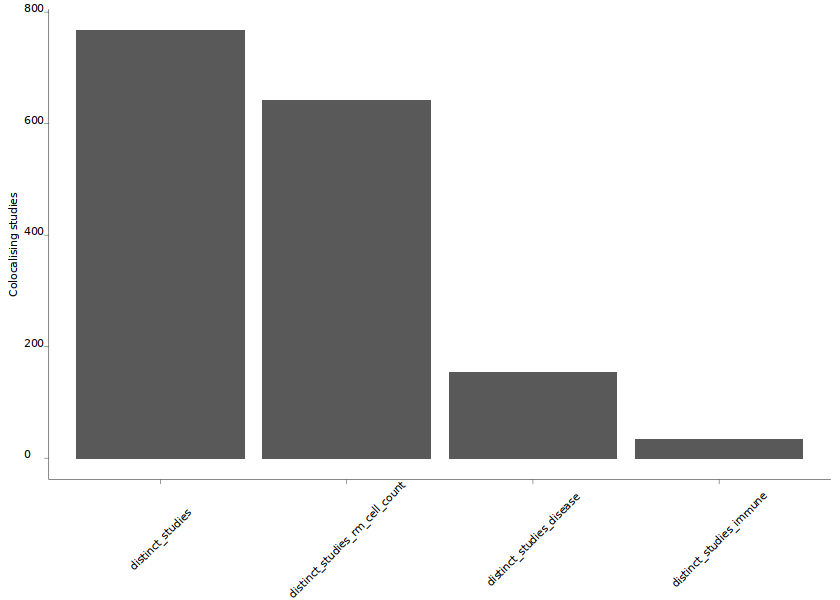

In [508]:
### Across all cell-types
options(repr.plot.width=7, repr.plot.height=5)
coloc_overview_all_plot = ggplot(overview_coloc_all[!is.na(str_extract(overview_coloc_all$variable, 'studies')),], aes(x=variable, y=value)) + 
    geom_bar(stat = "identity", position = "dodge")  + plot_config + ylab('Colocalising studies') + theme(axis.title.x = element_blank(), axis.text.x =element_text(angle = 45))
coloc_overview_all_plot

pdf(paste0('figures/G2/G2', 'Colocalising_studies',   '.pdf'), width =3, height =2.5)
print(coloc_overview_all_plot )
dev.off()

pdf 
  2

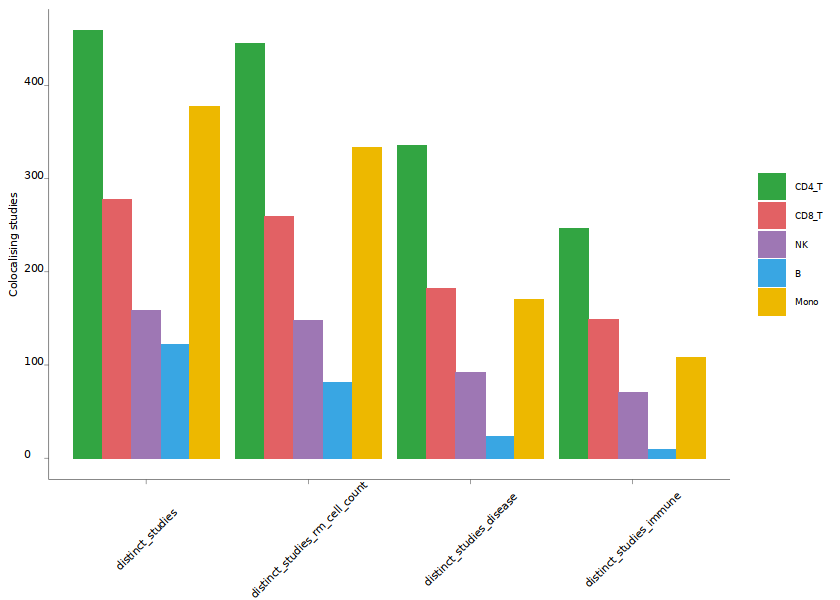

In [509]:
### Per cell-type
options(repr.plot.width=7, repr.plot.height=5)
coloc_overview_cell_type_plot = ggplot(overview_coloc_cell_type[!is.na(str_extract(overview_coloc_cell_type$variable, 'studies')),], aes(x=variable, y=value, fill = cell_type)) + 
    geom_bar(stat = "identity", position = "dodge")  + plot_config + ylab('Colocalising studies') + theme(axis.title.x = element_blank(), axis.text.x =element_text(angle = 45)) + cell_type_fill
coloc_overview_cell_type_plot

pdf(paste0('figures/G2/G2', 'Colocalising_studies_cell_type',   '.pdf'), width =3, height =2.5)
print(coloc_overview_cell_type_plot )
dev.off()

In [510]:
### Visualize for traits

pdf 
  2

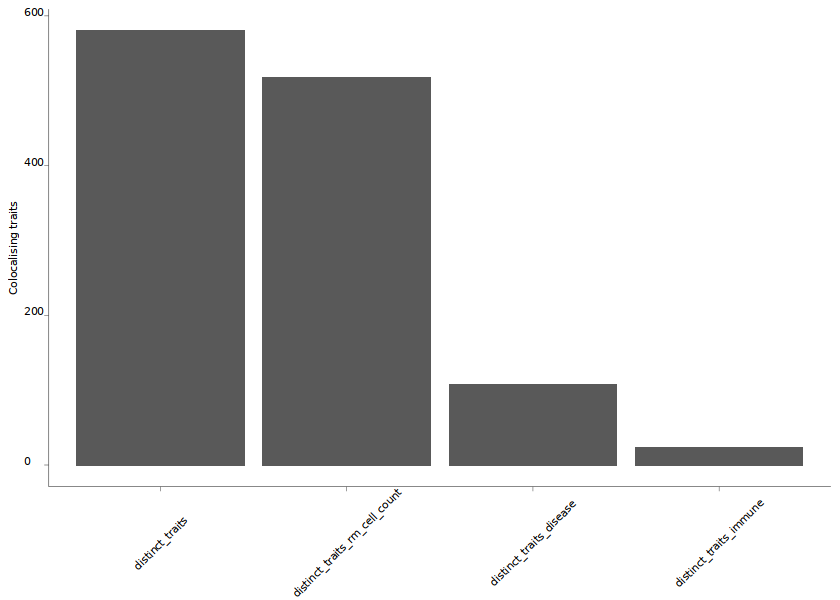

In [511]:
### Across all cell-types
options(repr.plot.width=7, repr.plot.height=5)
coloc_overview_all_plot = ggplot(overview_coloc_all[!is.na(str_extract(overview_coloc_all$variable, 'trait')),], aes(x=variable, y=value)) + 
    geom_bar(stat = "identity", position = "dodge")  + plot_config + ylab('Colocalising traits') + theme(axis.title.x = element_blank(), axis.text.x =element_text(angle = 45))
coloc_overview_all_plot


pdf(paste0('figures/G2/G2', 'Colocalising_traits',   '.pdf'), width =3, height =2.5)
print(coloc_overview_all_plot )
dev.off()

pdf 
  2

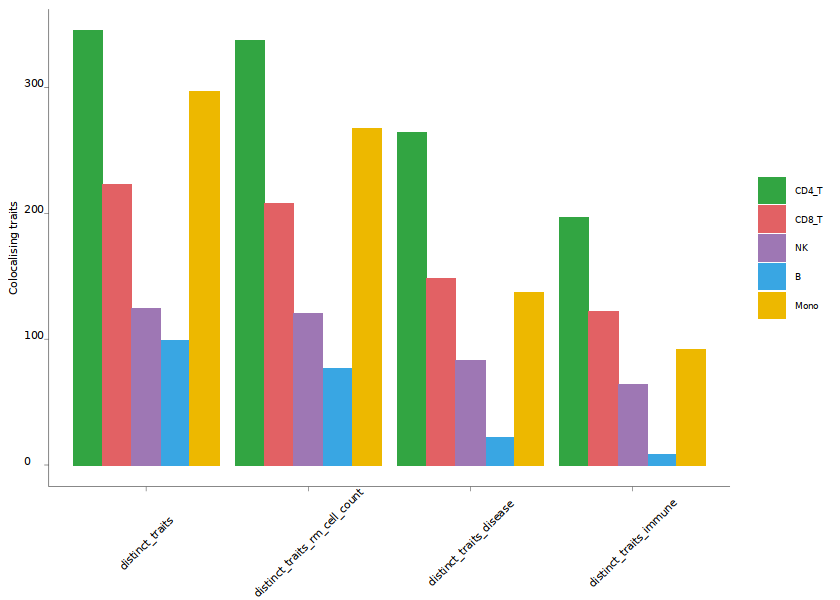

In [512]:
### Per cell-type
options(repr.plot.width=7, repr.plot.height=5)
coloc_overview_cell_type_plot = ggplot(overview_coloc_cell_type[!is.na(str_extract(overview_coloc_cell_type$variable, 'trait')),], aes(x=variable, y=value, fill = cell_type)) + 
    geom_bar(stat = "identity", position = "dodge")  + plot_config + ylab('Colocalising traits') + theme(axis.title.x = element_blank(), axis.text.x =element_text(angle = 45)) + cell_type_fill
coloc_overview_cell_type_plot

pdf(paste0('figures/G2/G2', 'Colocalising_traits_cell_types',   '.pdf'), width =3, height =2.5)
print(coloc_overview_cell_type_plot )
dev.off()

## Number ofcolocalizing eGenes and gene-pair per gwastrait

### Summarise coloc per eGene + CT

In [513]:
head(coloc_coeqtl,2)

,cell_type,gene_pair_fixed,eGene,SusieRss_CS,gwasEFO,snp_id,V1,leftStudyLocusId,leftStudyId,gwasTraitFromSource,⋯,motifbreakr_hit,coeGene_mt,coeGene_rib,eGene_mt,eGene_rib,gwas_disease_class,gwas_immune_class,Parent.term,PP.H4.abf,idx1
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
1,B,ABI1_RPS26,RPS26,1,EFO_0009770,12:56007301:G:A,1343,787173a24ef8d3dc4e8b46f2a5a415f7,GCST90092891,Leucine levels,⋯,,FALSE,FALSE,FALSE,TRUE,0,0,Other measurement,1,lbf_cs_1
2,B,ABI1_RPS26,RPS26,1,EFO_0004612,12:56007301:G:A,1330,bf21098bfe5647bd1f014c444f41b063,GCST90019510,High density lipoprotein cholesterol levels,⋯,,FALSE,FALSE,FALSE,TRUE,0,0,Lipid or lipoprotein measurement,1,lbf_cs_1


In [514]:
coloc_coeqtl$rm_cell_count  = 0
coloc_coeqtl$rm_cell_count[(coloc_coeqtl$Parent.term != 'Hematological measurement') & (!coloc_coeqtl$gwasTraitFromSource %in% c( 'basophil count', 'basophil percentage of leukocytes', 'basophil percentage of granulocytes'))] = 1

In [515]:
unique(coloc_coeqtl$rm_cell_count)

[1] 1 0

In [516]:
#unique(coloc_coeqtl$gwasTraitFromSource[coloc_coeqtl$rm_cell_count == 0])

In [517]:
egene_ct_sum = coloc_coeqtl %>% group_by(eGene, cell_type) %>% summarise(gwas_disase_class = max(gwas_disease_class),
                                                          gwas_immune_class = max(gwas_immune_class),
                                                          rm_cell_count = max(rm_cell_count))

`summarise()` has grouped output by 'eGene'. You can override using the `.groups` argument.


In [518]:
egene_ct_sum[egene_ct_sum$eGene == 'NRG1',]

eGene,cell_type,gwas_disase_class,gwas_immune_class,rm_cell_count
<chr>,<chr>,<dbl>,<dbl>,<dbl>
NRG1,Mono,1,0,1


In [519]:
egene_ct_sum  = egene_ct_sum[!is.na(egene_ct_sum$eGene),]

In [520]:
egene_ct_sum[is.na(egene_ct_sum)] = 0

In [521]:
head(egene_ct_sum,2)

eGene,cell_type,gwas_disase_class,gwas_immune_class,rm_cell_count
<chr>,<chr>,<dbl>,<dbl>,<dbl>
A2M,CD4_T,1,1,1
A2M-AS1,CD8_T,1,1,1


In [522]:
#egene_ct_sum[egene_ct_sum$gwas_disase_class == 1,]

In [523]:
### Save for usage in mechanism overview script
write.csv(egene_ct_sum, paste0(result_path, '/G2/', 'eGene_coloc_overview.csv'))

In [524]:
result_path

[1] "../data/current//results/"

In [525]:
unique(coloc_coeqtl$gwas_immune_class)

[1] 0 1

In [526]:
egene_ct_sum %>% group_by(gwas_disase_class, gwas_immune_class, rm_cell_count) %>% dplyr::count()

gwas_disase_class,gwas_immune_class,rm_cell_count,n
<dbl>,<dbl>,<dbl>,<int>
0,0,0,29
0,0,1,82
1,0,1,40
1,1,1,32


In [527]:
### Evaluate number of colocalising co-eQTLs whether ribosomal or not

In [528]:
coloc_coeqtl$rb_mt = 0
coloc_coeqtl$rb_mt[(coloc_coeqtl$coeGene_mt == TRUE) | (coloc_coeqtl$eGene_mt == TRUE) | (coloc_coeqtl$eGene_rib == TRUE) | (coloc_coeqtl$coeGene_rib == TRUE)] = 1
coloc_coeqtl$rb_mt_eGene = 0
coloc_coeqtl$rb_mt_eGene[(coloc_coeqtl$eGene_mt == TRUE) | (coloc_coeqtl$eGene_rib == TRUE)] = 1
coloc_coeqtl$rb_mt_coeGene = 0
coloc_coeqtl$rb_mt_coeGene[(coloc_coeqtl$coeGene_mt == TRUE) | (coloc_coeqtl$coeGene_rib == TRUE)] = 1

In [529]:
head(coloc_coeqtl,2)

,cell_type,gene_pair_fixed,eGene,SusieRss_CS,gwasEFO,snp_id,V1,leftStudyLocusId,leftStudyId,gwasTraitFromSource,⋯,eGene_rib,gwas_disease_class,gwas_immune_class,Parent.term,PP.H4.abf,idx1,rm_cell_count,rb_mt,rb_mt_eGene,rb_mt_coeGene
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<lgl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,B,ABI1_RPS26,RPS26,1,EFO_0009770,12:56007301:G:A,1343,787173a24ef8d3dc4e8b46f2a5a415f7,GCST90092891,Leucine levels,⋯,TRUE,0,0,Other measurement,1,lbf_cs_1,1,1,1,0
2,B,ABI1_RPS26,RPS26,1,EFO_0004612,12:56007301:G:A,1330,bf21098bfe5647bd1f014c444f41b063,GCST90019510,High density lipoprotein cholesterol levels,⋯,TRUE,0,0,Lipid or lipoprotein measurement,1,lbf_cs_1,1,1,1,0


In [530]:
#unique(coloc_coeqtl[coloc_coeqtl$cell_type == 'B',c('cell_type', 'eGene',  'eGene_mt', 'eGene_rib', 'rb_mt_eGene')] )

In [531]:
eGene_overview = unique(coloc_coeqtl[,c('cell_type', 'eGene',  'rb_mt_eGene')] ) %>% group_by(cell_type, rb_mt_eGene) %>% summarise(number_eGenes = length(unique(eGene)))

`summarise()` has grouped output by 'cell_type'. You can override using the `.groups` argument.


In [532]:
eGene_overview 

cell_type,rb_mt_eGene,number_eGenes
<chr>,<dbl>,<int>
B,0,11
B,1,4
CD4_T,0,66
CD4_T,1,12
CD8_T,0,33
CD8_T,1,5
Mono,0,28
Mono,1,5
NK,0,16


In [533]:
eGene_overview2 

cell_type,rb_mt_eGene,rb_mt_coeGene,number_eGenes_nrb_coeGene
<chr>,<dbl>,<dbl>,<int>
B,0,0,11
B,1,1,4
CD4_T,0,0,59
CD4_T,0,1,7
CD4_T,1,1,12
CD8_T,0,0,31
CD8_T,0,1,2
CD8_T,1,1,5
Mono,0,0,26


In [534]:
### per eGene summarise if is not ribosomal but all the co-eGenes are 

In [535]:
eGene_overview2 = unique(coloc_coeqtl[,c('cell_type', 'eGene',  'rb_mt_eGene' , 'rb_mt_coeGene')] ) %>% group_by(cell_type, eGene, rb_mt_eGene) %>% summarise(rb_mt_coeGene = min(rb_mt_coeGene))

`summarise()` has grouped output by 'cell_type', 'eGene'. You can override using the `.groups`
argument.


In [536]:
eGene_overview2$rb_mt_coeGene[eGene_overview2$rb_mt_eGene == 1] = 1

In [537]:
eGene_overview2  = eGene_overview2 %>% group_by(cell_type, rb_mt_eGene, rb_mt_coeGene) %>% summarise(number_eGenes_nrb_coeGene = length(unique(eGene)))

`summarise()` has grouped output by 'cell_type', 'rb_mt_eGene'. You can override using the `.groups`
argument.


In [538]:
### Check for gene-pairs (not involving any ribosomal/ mitochondrial gene vs. one 

In [539]:
gene_pair_overview = unique(coloc_coeqtl[,c('cell_type', 'gene_pair_fixed',  'rb_mt')] ) %>% group_by(cell_type, rb_mt) %>% summarise(number_gene_pairs = length(unique(gene_pair_fixed)))

`summarise()` has grouped output by 'cell_type'. You can override using the `.groups` argument.


In [540]:
gene_pair_overview

cell_type,rb_mt,number_gene_pairs
<chr>,<dbl>,<int>
B,0,54
B,1,592
CD4_T,0,1288
CD4_T,1,4355
CD8_T,0,345
CD8_T,1,2090
Mono,0,162
Mono,1,689
NK,0,92


### All traits

In [541]:
head(coloc_coeqtl,2)

,cell_type,gene_pair_fixed,eGene,SusieRss_CS,gwasEFO,snp_id,V1,leftStudyLocusId,leftStudyId,gwasTraitFromSource,⋯,eGene_rib,gwas_disease_class,gwas_immune_class,Parent.term,PP.H4.abf,idx1,rm_cell_count,rb_mt,rb_mt_eGene,rb_mt_coeGene
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<lgl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,B,ABI1_RPS26,RPS26,1,EFO_0009770,12:56007301:G:A,1343,787173a24ef8d3dc4e8b46f2a5a415f7,GCST90092891,Leucine levels,⋯,TRUE,0,0,Other measurement,1,lbf_cs_1,1,1,1,0
2,B,ABI1_RPS26,RPS26,1,EFO_0004612,12:56007301:G:A,1330,bf21098bfe5647bd1f014c444f41b063,GCST90019510,High density lipoprotein cholesterol levels,⋯,TRUE,0,0,Lipid or lipoprotein measurement,1,lbf_cs_1,1,1,1,0


In [542]:
### Colocalizing eGenes and gene-pairs per study per cell-type

In [543]:
summary_per_study = coloc_coeqtl %>% group_by( gwasTraitFromSource, Parent.term, cell_type) %>% summarise(unique_eGenes = length(unique(eGene)),
                                                                                                  unique_gene_pairs = length(unique(gene_pair_fixed)))

`summarise()` has grouped output by 'gwasTraitFromSource', 'Parent.term'. You can override using the
`.groups` argument.


In [544]:
summary_per_study$cell_type = factor(summary_per_study$cell_type, levels = c('Mono', 'B', 'NK', 'CD8_T', 'CD4_T'))

In [545]:
### Colocalizing eGenes and gene-pairs per study across all cell-types

In [546]:
summary_per_study_all = coloc_coeqtl %>% group_by( gwasTraitFromSource, Parent.term) %>% summarise(unique_eGenes = length(unique(eGene)),
                                                                                                  unique_gene_pairs = length(unique(gene_pair_fixed)))

`summarise()` has grouped output by 'gwasTraitFromSource'. You can override using the `.groups`
argument.


In [547]:
### Merge per cell-type and across all (filter on studies with mot eGene colocs)
head(summary_per_study,2)
summary_per_study_filtered = merge(summary_per_study, head(summary_per_study_all[,c('gwasTraitFromSource', 'unique_eGenes', 'unique_gene_pairs')] %>% arrange(-unique_eGenes),20), by = 'gwasTraitFromSource')
summary_per_study_filtered_gene_pair = merge(summary_per_study, head(summary_per_study_all[,c('gwasTraitFromSource', 'unique_eGenes', 'unique_gene_pairs')] %>% arrange(-unique_gene_pairs),20), by = 'gwasTraitFromSource')


gwasTraitFromSource,Parent.term,cell_type,unique_eGenes,unique_gene_pairs
<chr>,<chr>,<fct>,<int>,<int>
"12-item EPQ-R neuroticism questionnaire- responded """"""""""""""""""""""""""""""""yes"""""""""""""""""""""""""""""""" to """"""""""""""""""""""""""""""""Would you call yourself tense or 'highly strung'?"""""""""""""""""""""""""""""""" (UKB data field 1990)",Other measurement,CD4_T,2,237
Actinic keratosis,Cancer,B,1,1


In [548]:
head(summary_per_study_filtered ,2)

,gwasTraitFromSource,Parent.term,cell_type,unique_eGenes.x,unique_gene_pairs.x,unique_eGenes.y,unique_gene_pairs.y
,<chr>,<chr>,<fct>,<int>,<int>,<int>,<int>
1,Appendicular lean mass,Other measurement,NK,2,2,12,214
2,Appendicular lean mass,Other measurement,Mono,1,1,12,214


In [549]:
### Check studies with most colocs

In [550]:
#head(summary_per_study  %>% arrange(-unique_eGenes), 40)

In [551]:
max(nchar(summary_per_study_filtered$gwasTraitFromSource))
max(nchar(summary_per_study_filtered_gene_pair$gwasTraitFromSource))

[1] 43

[1] 55

In [552]:
### Limit characters for visualization


In [553]:
summary_per_study_filtered$gwasTraitFromSource = substr(summary_per_study_filtered$gwasTraitFromSource, 1, 40)
summary_per_study_filtered_gene_pair$gwasTraitFromSource = substr(summary_per_study_filtered_gene_pair$gwasTraitFromSource, 1, 40)
summary_per_study_all$gwasTraitFromSource = substr(summary_per_study_all$gwasTraitFromSource, 1, 40)

In [554]:
### Visualize studies with most colocs (all)

In [555]:
### Plot for studies

pdf 
  2

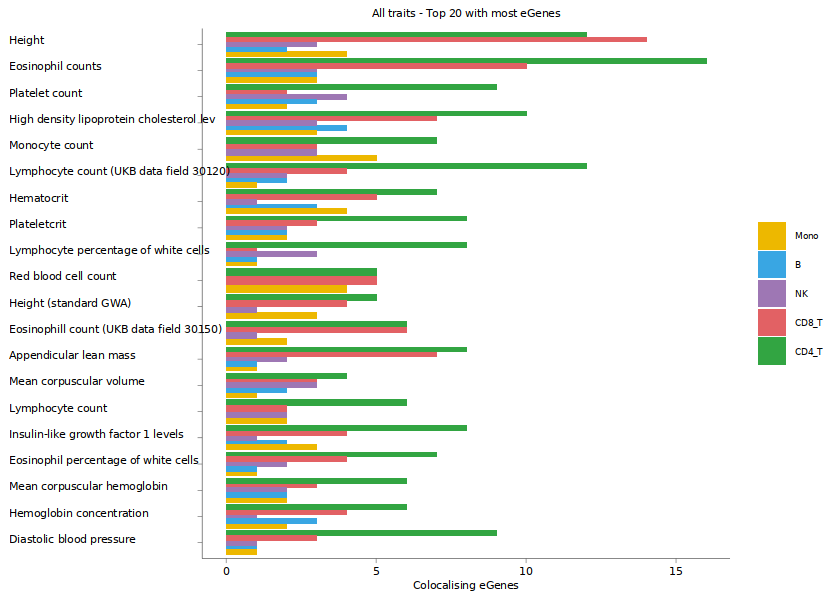

In [556]:
### eGenes
options(repr.plot.width=7, repr.plot.height=5)
study_overview_coloc_eGene = ggplot( summary_per_study_filtered, aes(x=reorder(	gwasTraitFromSource, unique_eGenes.y), y=unique_eGenes.x, fill = cell_type)) + 
    geom_bar(stat = "identity", position = "dodge")  + plot_config + ylab('Colocalising eGenes') + theme(axis.title.y = element_blank(), axis.text.x =element_text(angle = 0)) + cell_type_fill + ggtitle('All traits - Top 20 with most eGenes') + coord_flip()
study_overview_coloc_eGene

pdf(paste0('figures/G2/G2', 'Colocalising_eGenes_per_trait',   '.pdf'), width =4, height =3)
print(study_overview_coloc_eGene )
dev.off()

pdf 
  2

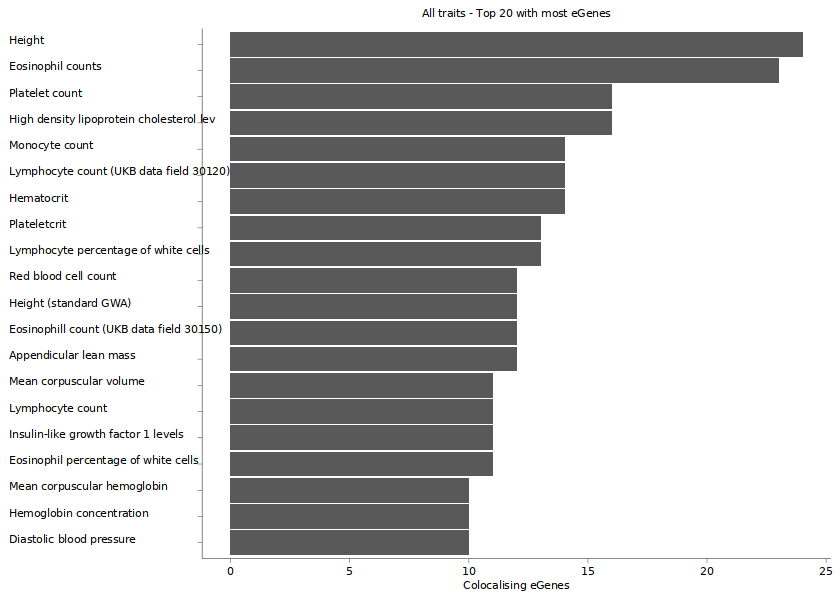

In [557]:
### eGenes across cell-type
options(repr.plot.width=7, repr.plot.height=5)
study_overview_coloc_eGene = ggplot(head(summary_per_study_all[,c('gwasTraitFromSource', 'unique_eGenes', 'unique_gene_pairs')] %>% arrange(-unique_eGenes),20) , aes(x=reorder(gwasTraitFromSource, unique_eGenes), y=unique_eGenes)) + 
    geom_bar(stat = "identity", position = "dodge")  + plot_config + ylab('Colocalising eGenes') + theme(axis.title.y = element_blank(), axis.text.x =element_text(angle = 0)) + ggtitle('All traits - Top 20 with most eGenes') + coord_flip()
study_overview_coloc_eGene

pdf(paste0('figures/G2/G2', 'Colocalising_eGenes_per_trait_all_cell_types',   '.pdf'), width =4, height =3)
print(study_overview_coloc_eGene)
dev.off()

pdf 
  2

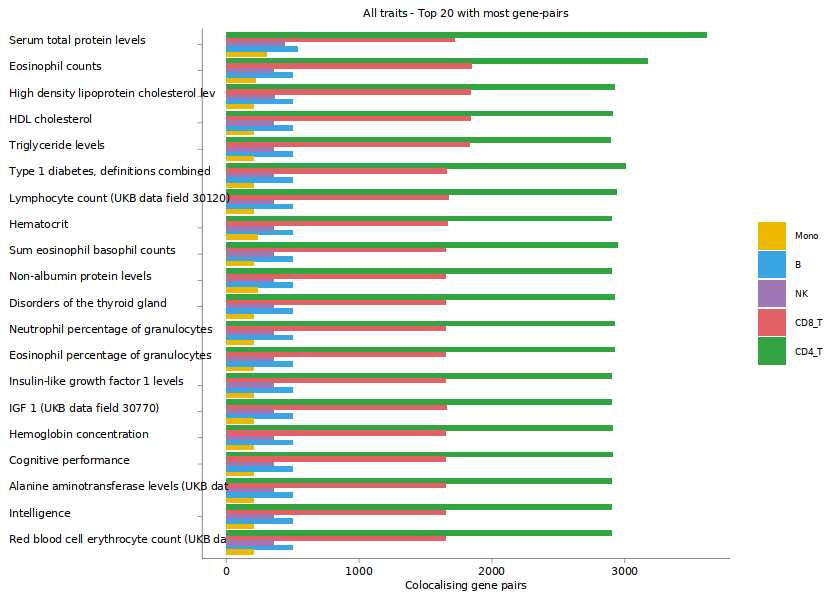

In [558]:
### gene-pairs
options(repr.plot.width=7, repr.plot.height=5)
study_overview_coloc_gene_pair = ggplot( summary_per_study_filtered_gene_pair , aes(x=reorder(	gwasTraitFromSource, unique_gene_pairs.y), y=unique_gene_pairs.x, fill = cell_type)) + 
    geom_bar(stat = "identity", position = "dodge")  + plot_config + ylab('Colocalising gene pairs') + theme(axis.title.y = element_blank(), axis.text.x =element_text(angle = 0)) + cell_type_fill+ ggtitle('All traits - Top 20 with most gene-pairs') + coord_flip()
study_overview_coloc_gene_pair


pdf(paste0('figures/G2/G2', 'Colocalising_gene_pairs_per_trait',   '.pdf'), width =4, height =3)
print(study_overview_coloc_gene_pair)
dev.off()

pdf 
  2

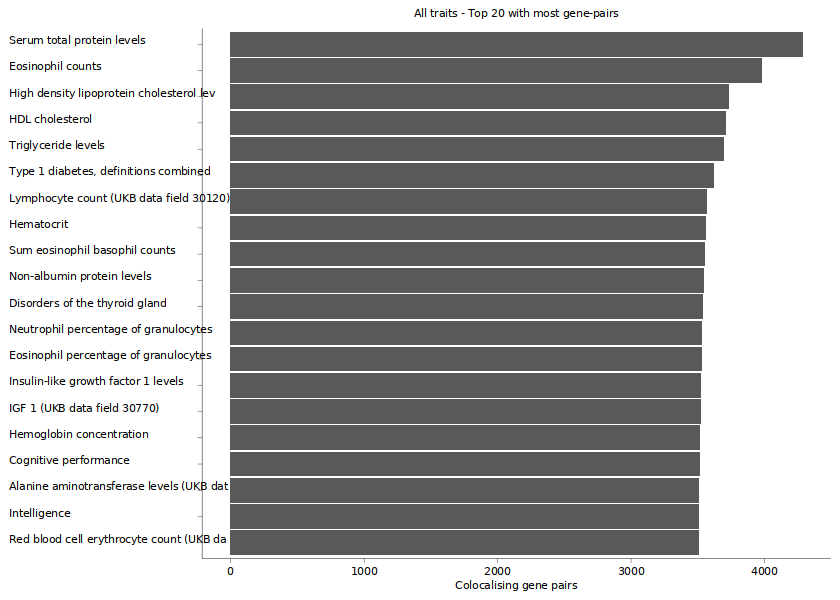

In [559]:
### gene-pairs across cell-type
options(repr.plot.width=7, repr.plot.height=5)
study_overview_coloc_gene_pair = ggplot(head(summary_per_study_all[,c('gwasTraitFromSource', 'unique_eGenes', 'unique_gene_pairs')] %>% arrange(-unique_gene_pairs),20) , aes(x=reorder(gwasTraitFromSource, unique_gene_pairs), y=unique_gene_pairs)) + 
    geom_bar(stat = "identity", position = "dodge")  + plot_config + ylab('Colocalising gene pairs') + theme(axis.title.y = element_blank(), axis.text.x =element_text(angle = 0)) + ggtitle('All traits - Top 20 with most gene-pairs') + coord_flip()
study_overview_coloc_gene_pair

pdf(paste0('figures/G2/G2', 'Colocalising_gene_pairs_per_trait_all_cell_types',   '.pdf'), width =4, height =3)
print(study_overview_coloc_gene_pair)
dev.off()

### Only disease traits

In [560]:
### Colocalizing eGenes and gene-pairs per study per cell-type only for disease traits

In [561]:
head(coloc_coeqtl,2)

,cell_type,gene_pair_fixed,eGene,SusieRss_CS,gwasEFO,snp_id,V1,leftStudyLocusId,leftStudyId,gwasTraitFromSource,⋯,eGene_rib,gwas_disease_class,gwas_immune_class,Parent.term,PP.H4.abf,idx1,rm_cell_count,rb_mt,rb_mt_eGene,rb_mt_coeGene
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<lgl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,B,ABI1_RPS26,RPS26,1,EFO_0009770,12:56007301:G:A,1343,787173a24ef8d3dc4e8b46f2a5a415f7,GCST90092891,Leucine levels,⋯,TRUE,0,0,Other measurement,1,lbf_cs_1,1,1,1,0
2,B,ABI1_RPS26,RPS26,1,EFO_0004612,12:56007301:G:A,1330,bf21098bfe5647bd1f014c444f41b063,GCST90019510,High density lipoprotein cholesterol levels,⋯,TRUE,0,0,Lipid or lipoprotein measurement,1,lbf_cs_1,1,1,1,0


In [562]:
### Calculate unique eGenes and gene-pairs per study and cell-type

In [563]:
summary_per_study = coloc_coeqtl[coloc_coeqtl$gwas_disease_class ==1,] %>% group_by( gwasTraitFromSource, Parent.term, cell_type) %>% summarise(unique_eGenes = length(unique(eGene)),
                                                                                                  unique_gene_pairs = length(unique(gene_pair_fixed)))

`summarise()` has grouped output by 'gwasTraitFromSource', 'Parent.term'. You can override using the
`.groups` argument.


In [564]:
summary_per_study$cell_type = factor(summary_per_study$cell_type, levels = c('Mono', 'B', 'NK', 'CD8_T', 'CD4_T'))

In [565]:
### Calculate unique eGenes and gene-pairs per study across all cell-types

In [566]:
summary_per_study_all = coloc_coeqtl[coloc_coeqtl$gwas_disease_class ==1,] %>% group_by( gwasTraitFromSource, Parent.term) %>% summarise(unique_eGenes = length(unique(eGene)),
                                                                                                  unique_gene_pairs = length(unique(gene_pair_fixed)))

`summarise()` has grouped output by 'gwasTraitFromSource'. You can override using the `.groups`
argument.


In [567]:
### Merge per cell-type and all results (filter on studies with most eGene colocs)
head(summary_per_study,2)
summary_per_study_filtered = merge(summary_per_study, head(summary_per_study_all[,c('gwasTraitFromSource', 'unique_eGenes', 'unique_gene_pairs')] %>% arrange(-unique_eGenes),20), by = 'gwasTraitFromSource')
summary_per_study_filtered_gene_pair = merge(summary_per_study, head(summary_per_study_all[,c('gwasTraitFromSource', 'unique_eGenes', 'unique_gene_pairs')] %>% arrange(-unique_gene_pairs),20), by = 'gwasTraitFromSource')


gwasTraitFromSource,Parent.term,cell_type,unique_eGenes,unique_gene_pairs
<chr>,<chr>,<fct>,<int>,<int>
Actinic keratosis,Cancer,B,1,1
Actinic keratosis,Cancer,CD4_T,1,12


In [568]:
## Limit characters for visualization

In [569]:
summary_per_study_filtered$gwasTraitFromSource = substr(summary_per_study_filtered$gwasTraitFromSource, 1, 25)
summary_per_study_filtered_gene_pair$gwasTraitFromSource = substr(summary_per_study_filtered_gene_pair$gwasTraitFromSource, 1, 25)
summary_per_study_all$gwasTraitFromSource = substr(summary_per_study_all$gwasTraitFromSource, 1, 25)

In [570]:
head(summary_per_study_filtered ,2)

,gwasTraitFromSource,Parent.term,cell_type,unique_eGenes.x,unique_gene_pairs.x,unique_eGenes.y,unique_gene_pairs.y
,<chr>,<chr>,<fct>,<int>,<int>,<int>,<int>
1,Allergic rhinitis (Firth,Immune system disorder,CD4_T,2,15,2,15
2,Allergic rhinitis (SPA co,Immune system disorder,CD4_T,2,15,2,15


In [571]:
### Visualize studies with most colocs (all)

In [572]:
### Plot for studies

pdf 
  2

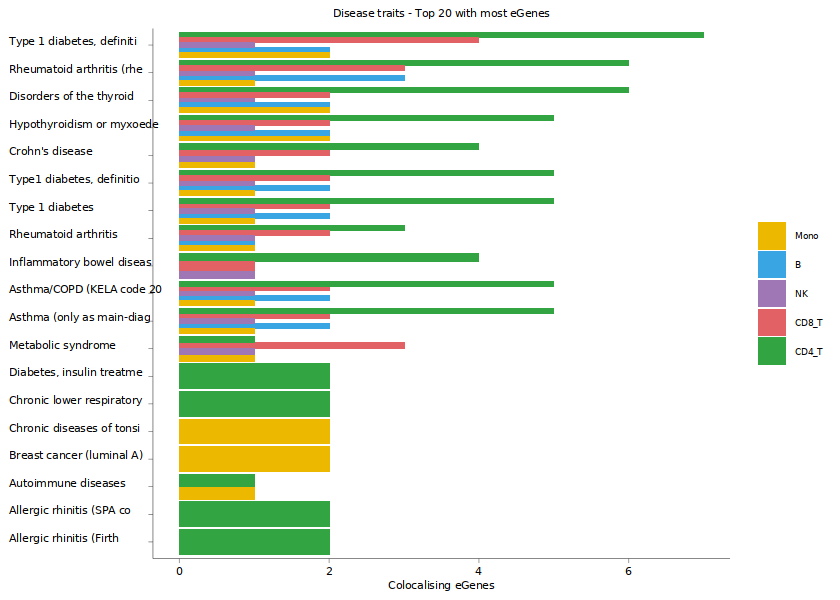

In [573]:
### eGenes
options(repr.plot.width=7, repr.plot.height=5)
study_overview_coloc_eGene = ggplot( summary_per_study_filtered, aes(x=reorder(	gwasTraitFromSource, unique_eGenes.y), y=unique_eGenes.x, fill = cell_type)) + 
    geom_bar(stat = "identity", position = "dodge")  + plot_config + ylab('Colocalising eGenes') + theme(axis.title.y = element_blank(), axis.text.x =element_text(angle = 0)) + cell_type_fill + ggtitle('Disease traits - Top 20 with most eGenes') + coord_flip()
study_overview_coloc_eGene

pdf(paste0('figures/G2/G2', 'Colocalising_eGenes_per_trait_only_disease',   '.pdf'), width =3, height =3)
print(study_overview_coloc_eGene )
dev.off()

pdf 
  2

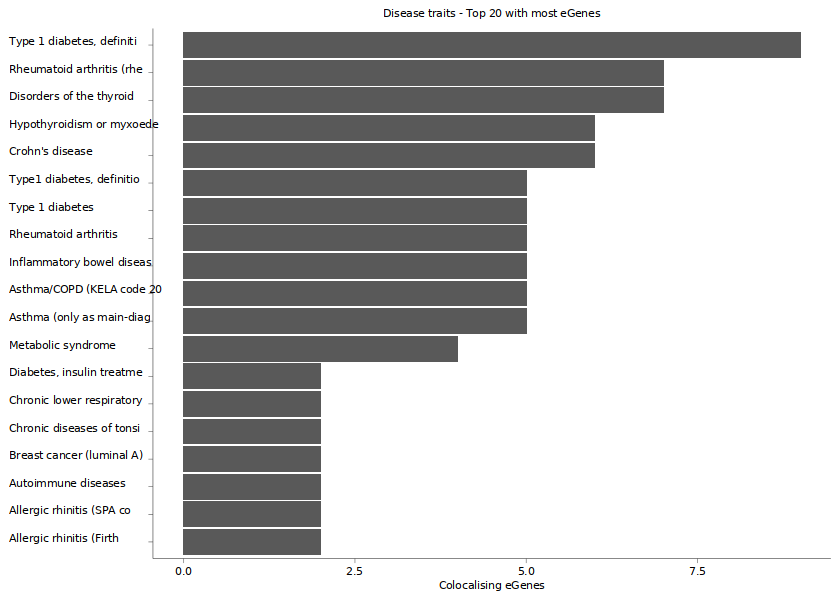

In [574]:
### eGenes across cell-type
options(repr.plot.width=7, repr.plot.height=5)
study_overview_coloc_eGene = ggplot(head(summary_per_study_all[,c('gwasTraitFromSource', 'unique_eGenes', 'unique_gene_pairs')] %>% arrange(-unique_eGenes),20) , aes(x=reorder(gwasTraitFromSource, unique_eGenes), y=unique_eGenes)) + 
    geom_bar(stat = "identity", position = "dodge")  + plot_config + ylab('Colocalising eGenes') + theme(axis.title.y = element_blank(), axis.text.x =element_text(angle = 0)) + ggtitle('Disease traits - Top 20 with most eGenes') + coord_flip()
study_overview_coloc_eGene

pdf(paste0('figures/G2/G2', 'Colocalising_eGenes_per_trait_only_disease_all_cell_types',   '.pdf'), width =4, height =3)
print(study_overview_coloc_eGene)
dev.off()

pdf 
  2

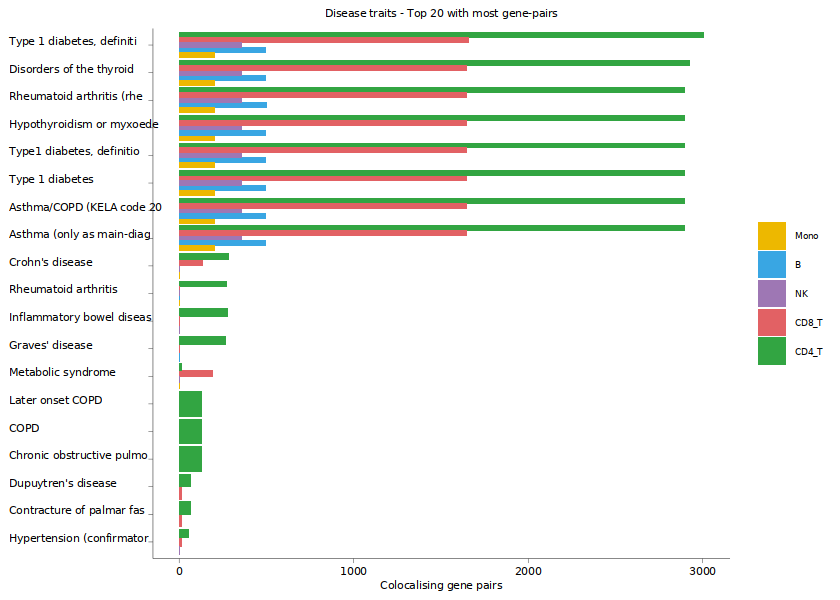

In [575]:
### gene-pairs
options(repr.plot.width=7, repr.plot.height=5)
study_overview_coloc_gene_pair = ggplot( summary_per_study_filtered_gene_pair , aes(x=reorder(	gwasTraitFromSource, unique_gene_pairs.y), y=unique_gene_pairs.x, fill = cell_type)) + 
    geom_bar(stat = "identity", position = "dodge")  + plot_config + ylab('Colocalising gene pairs') + theme(axis.title.y = element_blank(), axis.text.x =element_text(angle = 0)) + cell_type_fill+ ggtitle('Disease traits - Top 20 with most gene-pairs') + coord_flip()
study_overview_coloc_gene_pair


pdf(paste0('figures/G2/G2', 'Colocalising_gene_pairs_per_trait_only_disease',   '.pdf'), width =3, height =3)
print(study_overview_coloc_gene_pair)
dev.off()

pdf 
  2

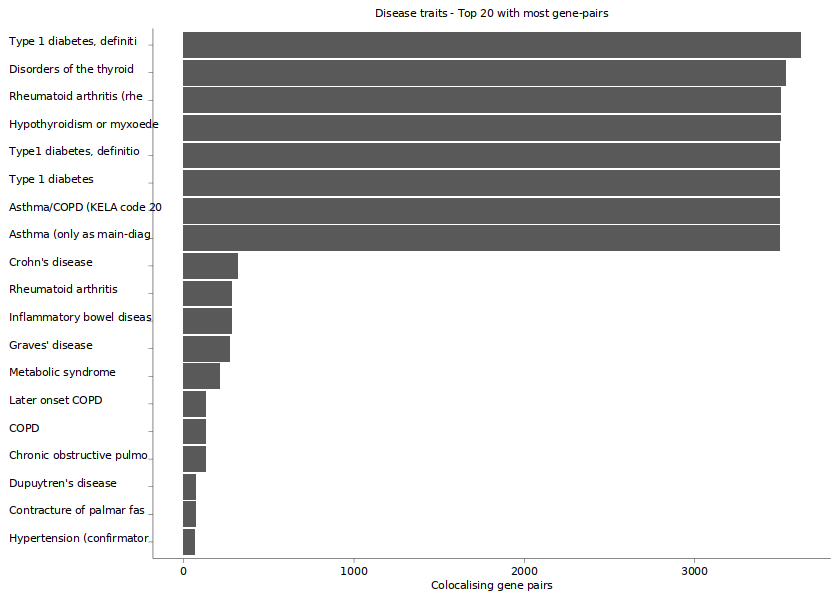

In [576]:
### gene-pairs across cell-type
options(repr.plot.width=7, repr.plot.height=5)
study_overview_coloc_gene_pair = ggplot(head(summary_per_study_all[,c('gwasTraitFromSource', 'unique_eGenes', 'unique_gene_pairs')] %>% arrange(-unique_gene_pairs),20) , aes(x=reorder(gwasTraitFromSource, unique_gene_pairs), y=unique_gene_pairs)) + 
    geom_bar(stat = "identity", position = "dodge")  + plot_config + ylab('Colocalising gene pairs') + theme(axis.title.y = element_blank(), axis.text.x =element_text(angle = 0)) + ggtitle('Disease traits - Top 20 with most gene-pairs') + coord_flip()
study_overview_coloc_gene_pair

pdf(paste0('figures/G2/G2', 'Colocalising_gene_pairs_per_trait_only_disease_all_cell_types',   '.pdf'), width =4, height =3)
print(study_overview_coloc_gene_pair)
dev.off()

### All traits without cell-count

In [577]:
### Colocalizing eGenes and gene-pairs per study per cell-type only for disease traits

In [578]:
head(coloc_coeqtl,2)

,cell_type,gene_pair_fixed,eGene,SusieRss_CS,gwasEFO,snp_id,V1,leftStudyLocusId,leftStudyId,gwasTraitFromSource,⋯,eGene_rib,gwas_disease_class,gwas_immune_class,Parent.term,PP.H4.abf,idx1,rm_cell_count,rb_mt,rb_mt_eGene,rb_mt_coeGene
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<lgl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,B,ABI1_RPS26,RPS26,1,EFO_0009770,12:56007301:G:A,1343,787173a24ef8d3dc4e8b46f2a5a415f7,GCST90092891,Leucine levels,⋯,TRUE,0,0,Other measurement,1,lbf_cs_1,1,1,1,0
2,B,ABI1_RPS26,RPS26,1,EFO_0004612,12:56007301:G:A,1330,bf21098bfe5647bd1f014c444f41b063,GCST90019510,High density lipoprotein cholesterol levels,⋯,TRUE,0,0,Lipid or lipoprotein measurement,1,lbf_cs_1,1,1,1,0


In [579]:
sort(colnames(coloc_coeqtl))

[1] "cell_type"                  "cell_type_gene_pair"       
 [3] "chromosome"                 "coeGene"                   
 [5] "coeGene_mt"                 "coeGene_rib"               
 [7] "coeqtl_log10BF"             "coeqtl_pValueExponent"     
 [9] "coeqtl_pValueMantissa"      "coeqtl_variantId"          
[11] "coeqtl_zScore"              "eGene"                     
[13] "eGene_mt"                   "eGene_rib"                 
[15] "gene_pair"                  "gene_pair_fixed"           
[17] "gwas_disease_class"         "gwas_immune_class"         
[19] "gwasEFO"                    "gwasTraitFromSource"       
[21] "h0"                         "h1"                        
[23] "h2"                         "h3"                        
[25] "h4"                         "idx1"                      
[27] "leadPIP"                    "leftStudyId"               
[29] "leftStudyLocusId"           "motifbreakr_hit"           
[31] "numberColocalisingVariants" "Parent.term"               
[33] "PP.H4.abf"                  "rb_mt"                     
[35] "rb_mt_coeGene"              "rb_mt_eGene"               
[37] "region"                     "rightStudyId"              
[39] "rightStudyLocusId"          "rm_cell_count"             
[41] "snp_id"                     "SusieRss_CS"               
[43] "V1"

In [580]:
### Calculate unique eGenes and gene-pairs per study and cell-type

In [581]:
summary_per_study = coloc_coeqtl[(coloc_coeqtl$Parent.term != 'Hematological measurement') & (!coloc_coeqtl$gwasTraitFromSource %in% c( 'basophil count', 'basophil percentage of leukocytes', 'basophil percentage of granulocytes')) ,] %>% group_by( gwasTraitFromSource, Parent.term, cell_type) %>% summarise(unique_eGenes = length(unique(eGene)),
                                                                                                  unique_gene_pairs = length(unique(gene_pair_fixed)))

`summarise()` has grouped output by 'gwasTraitFromSource', 'Parent.term'. You can override using the
`.groups` argument.


In [582]:
summary_per_study$cell_type = factor(summary_per_study$cell_type, levels = c('Mono', 'B', 'NK', 'CD8_T', 'CD4_T'))

In [583]:
### Calculate unique eGenes and gene-pairs per study across cell-types

In [584]:
summary_per_study_all = coloc_coeqtl[(coloc_coeqtl$Parent.term != 'Hematological measurement') & (!coloc_coeqtl$gwasTraitFromSource %in% c( 'basophil count', 'basophil percentage of leukocytes', 'basophil percentage of granulocytes')),] %>% group_by( gwasTraitFromSource, Parent.term) %>% summarise(unique_eGenes = length(unique(eGene)),
                                                                                                  unique_gene_pairs = length(unique(gene_pair_fixed)))

`summarise()` has grouped output by 'gwasTraitFromSource'. You can override using the `.groups`
argument.


In [585]:
### merge per cell -type and all (filter on studies with most eGene colocs)
head(summary_per_study,2)
summary_per_study_filtered = merge(summary_per_study, head(summary_per_study_all[,c('gwasTraitFromSource', 'unique_eGenes', 'unique_gene_pairs')] %>% arrange(-unique_eGenes),20), by = 'gwasTraitFromSource')
summary_per_study_filtered_gene_pair = merge(summary_per_study, head(summary_per_study_all[,c('gwasTraitFromSource', 'unique_eGenes', 'unique_gene_pairs')] %>% arrange(-unique_gene_pairs),20), by = 'gwasTraitFromSource')


gwasTraitFromSource,Parent.term,cell_type,unique_eGenes,unique_gene_pairs
<chr>,<chr>,<fct>,<int>,<int>
"12-item EPQ-R neuroticism questionnaire- responded """"""""""""""""""""""""""""""""yes"""""""""""""""""""""""""""""""" to """"""""""""""""""""""""""""""""Would you call yourself tense or 'highly strung'?"""""""""""""""""""""""""""""""" (UKB data field 1990)",Other measurement,CD4_T,2,237
Actinic keratosis,Cancer,B,1,1


In [586]:
### Save data for plots

In [587]:
write.csv(summary_per_study_filtered, 'Filtered_Top20eGene.csv')
write.csv(summary_per_study_filtered_gene_pair, 'Filtered_Top20genepair.csv')

In [588]:
write.csv(summary_per_study, 'Traits_with_numbereGenes_and_numbergenepairs_coloc.csv')

In [589]:
### Adjust texts

In [590]:
summary_per_study_filtered$gwasTraitFromSource = substr(summary_per_study_filtered$gwasTraitFromSource, 1, 40)
summary_per_study_filtered_gene_pair$gwasTraitFromSource = substr(summary_per_study_filtered_gene_pair$gwasTraitFromSource, 1, 40)
summary_per_study_all$gwasTraitFromSource = substr(summary_per_study_all$gwasTraitFromSource, 1, 40)

In [591]:
### Check studies with most colocs

In [592]:
### Visualize studies with most colocs (all)

In [593]:
### Plot for studies

pdf 
  2

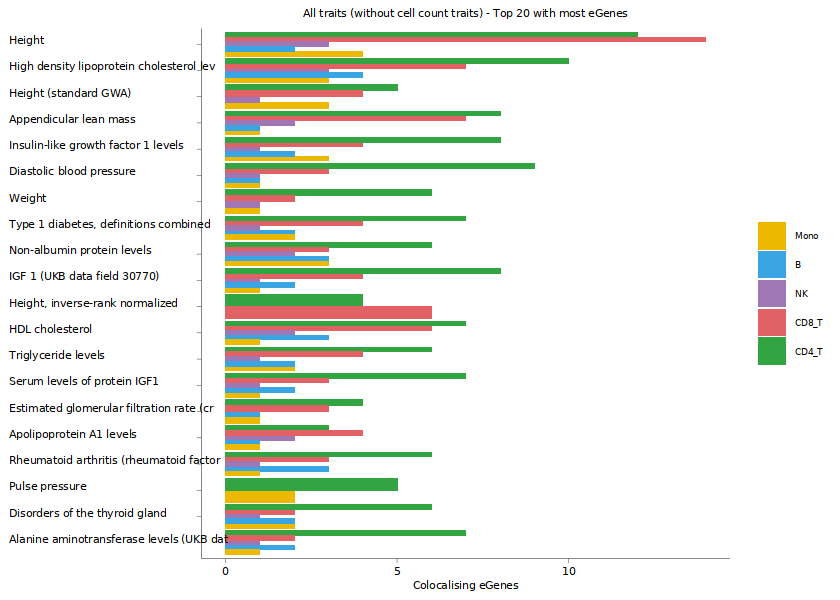

In [594]:
### eGenes
### eGenes
options(repr.plot.width=7, repr.plot.height=5)
study_overview_coloc_eGene = ggplot( summary_per_study_filtered, aes(x=reorder(	gwasTraitFromSource, unique_eGenes.y), y=unique_eGenes.x, fill = cell_type)) + 
    geom_bar(stat = "identity", position = "dodge")  + plot_config + ylab('Colocalising eGenes') + theme(axis.title.y = element_blank(), axis.text.x =element_text(angle = 0)) + cell_type_fill + ggtitle('All traits (without cell count traits) - Top 20 with most eGenes') + coord_flip()
study_overview_coloc_eGene

pdf(paste0('figures/G2/G2', 'Colocalising_eGenes_per_trait_rm_cel_count',   '.pdf'), width =4, height =3)
print(study_overview_coloc_eGene )
dev.off()

pdf 
  2

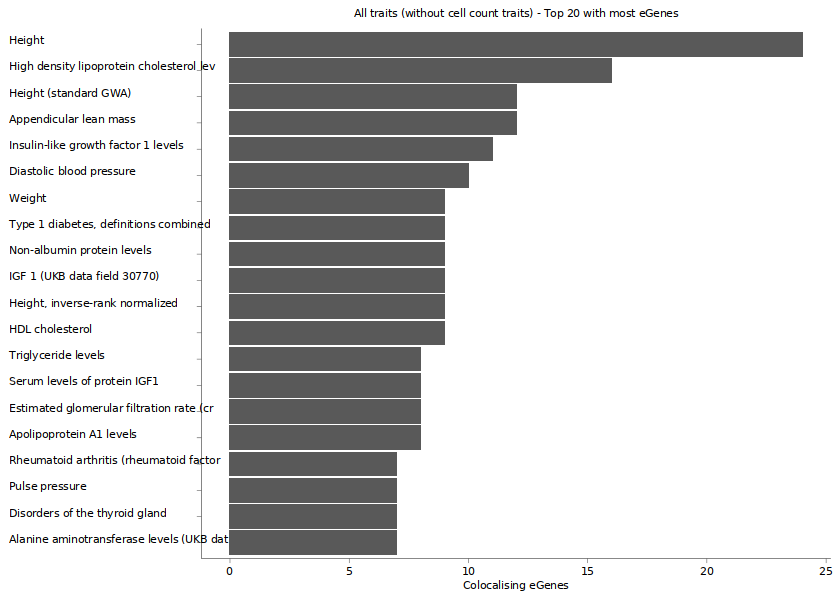

In [595]:
### eGenes across cell-type
options(repr.plot.width=7, repr.plot.height=5)
study_overview_coloc_eGene = ggplot(head(summary_per_study_all[,c('gwasTraitFromSource', 'unique_eGenes', 'unique_gene_pairs')] %>% arrange(-unique_eGenes),20) , aes(x=reorder(gwasTraitFromSource, unique_eGenes), y=unique_eGenes)) + 
    geom_bar(stat = "identity", position = "dodge")  + plot_config + ylab('Colocalising eGenes') + theme(axis.title.y = element_blank(), axis.text.x =element_text(angle = 0)) + ggtitle('All traits (without cell count traits) - Top 20 with most eGenes') + coord_flip()
study_overview_coloc_eGene

pdf(paste0('figures/G2/G2', 'Colocalising_eGenes_per_trait_rm_cell_count_all_cell_types',   '.pdf'), width =4, height =3)
print(study_overview_coloc_eGene)
dev.off()

pdf 
  2

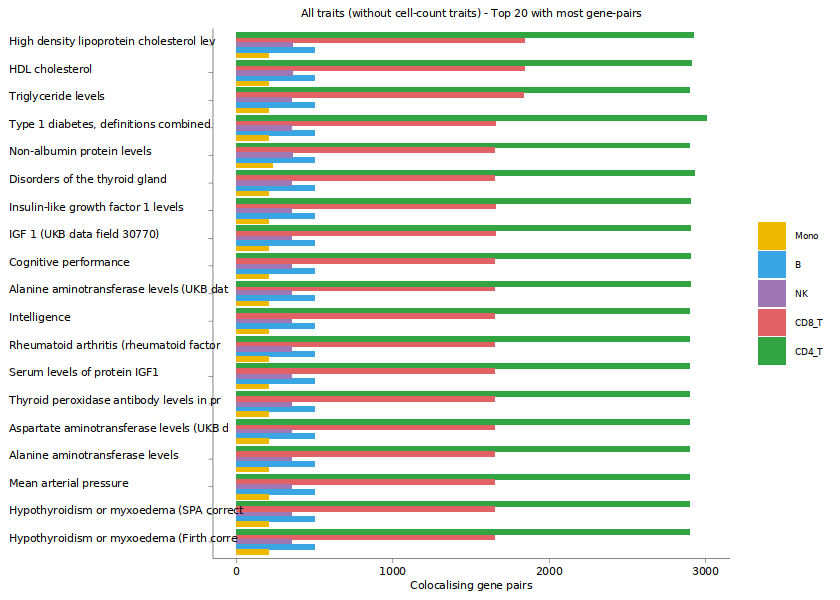

In [596]:
### gene-pairs
### gene-pairs
options(repr.plot.width=7, repr.plot.height=5)
study_overview_coloc_gene_pair = ggplot( summary_per_study_filtered_gene_pair , aes(x=reorder(	gwasTraitFromSource, unique_gene_pairs.y), y=unique_gene_pairs.x, fill = cell_type)) + 
    geom_bar(stat = "identity", position = "dodge")  + plot_config + ylab('Colocalising gene pairs') + theme(axis.title.y = element_blank(), axis.text.x =element_text(angle = 0)) + cell_type_fill+ ggtitle('All traits (without cell-count traits) - Top 20 with most gene-pairs') + coord_flip()
study_overview_coloc_gene_pair


pdf(paste0('figures/G2/G2', 'Colocalising_gene_pairs_per_trait_rm_cell_count',   '.pdf'), width =4, height =3)
print(study_overview_coloc_gene_pair)
dev.off()

pdf 
  2

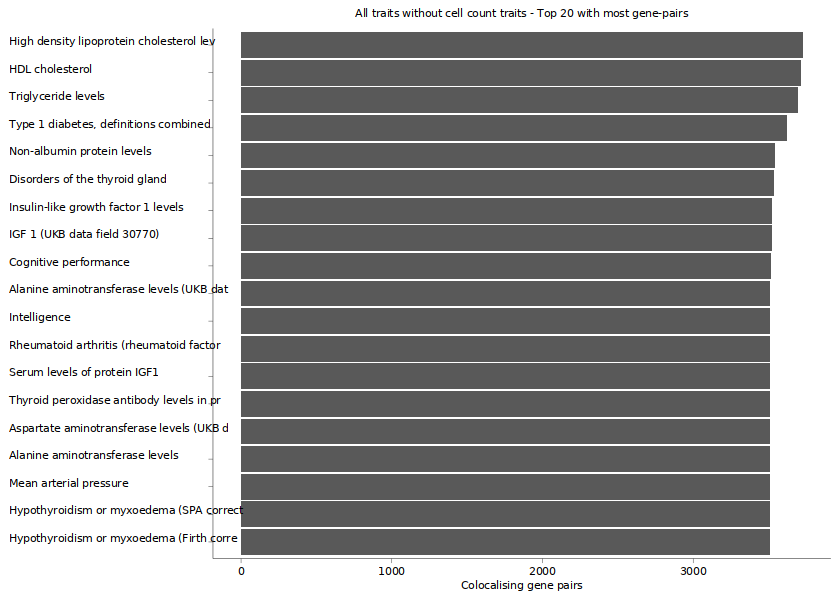

In [597]:
### gene-pairs across cell-type
options(repr.plot.width=7, repr.plot.height=5)
study_overview_coloc_gene_pair = ggplot(head(summary_per_study_all[,c('gwasTraitFromSource', 'unique_eGenes', 'unique_gene_pairs')] %>% arrange(-unique_gene_pairs),20) , aes(x=reorder(gwasTraitFromSource, unique_gene_pairs), y=unique_gene_pairs)) + 
    geom_bar(stat = "identity", position = "dodge")  + plot_config + ylab('Colocalising gene pairs') + theme(axis.title.y = element_blank(), axis.text.x =element_text(angle = 0)) + ggtitle('All traits without cell count traits - Top 20 with most gene-pairs') + coord_flip()
study_overview_coloc_gene_pair

pdf(paste0('figures/G2/G2', 'Colocalising_gene_pairs_per_trait_rm_cell_count_all_cell_types',   '.pdf'), width =4, height =3)
print(study_overview_coloc_gene_pair)
dev.off()

### Only immune traits

In [598]:
head(coloc_coeqtl,2)

,cell_type,gene_pair_fixed,eGene,SusieRss_CS,gwasEFO,snp_id,V1,leftStudyLocusId,leftStudyId,gwasTraitFromSource,⋯,eGene_rib,gwas_disease_class,gwas_immune_class,Parent.term,PP.H4.abf,idx1,rm_cell_count,rb_mt,rb_mt_eGene,rb_mt_coeGene
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<lgl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,B,ABI1_RPS26,RPS26,1,EFO_0009770,12:56007301:G:A,1343,787173a24ef8d3dc4e8b46f2a5a415f7,GCST90092891,Leucine levels,⋯,TRUE,0,0,Other measurement,1,lbf_cs_1,1,1,1,0
2,B,ABI1_RPS26,RPS26,1,EFO_0004612,12:56007301:G:A,1330,bf21098bfe5647bd1f014c444f41b063,GCST90019510,High density lipoprotein cholesterol levels,⋯,TRUE,0,0,Lipid or lipoprotein measurement,1,lbf_cs_1,1,1,1,0


In [599]:
sort(colnames(coloc_coeqtl))

[1] "cell_type"                  "cell_type_gene_pair"       
 [3] "chromosome"                 "coeGene"                   
 [5] "coeGene_mt"                 "coeGene_rib"               
 [7] "coeqtl_log10BF"             "coeqtl_pValueExponent"     
 [9] "coeqtl_pValueMantissa"      "coeqtl_variantId"          
[11] "coeqtl_zScore"              "eGene"                     
[13] "eGene_mt"                   "eGene_rib"                 
[15] "gene_pair"                  "gene_pair_fixed"           
[17] "gwas_disease_class"         "gwas_immune_class"         
[19] "gwasEFO"                    "gwasTraitFromSource"       
[21] "h0"                         "h1"                        
[23] "h2"                         "h3"                        
[25] "h4"                         "idx1"                      
[27] "leadPIP"                    "leftStudyId"               
[29] "leftStudyLocusId"           "motifbreakr_hit"           
[31] "numberColocalisingVariants" "Parent.term"               
[33] "PP.H4.abf"                  "rb_mt"                     
[35] "rb_mt_coeGene"              "rb_mt_eGene"               
[37] "region"                     "rightStudyId"              
[39] "rightStudyLocusId"          "rm_cell_count"             
[41] "snp_id"                     "SusieRss_CS"               
[43] "V1"

In [600]:
summary_per_study = coloc_coeqtl[(coloc_coeqtl$gwas_immune_class == 1) ,] %>% group_by( gwasTraitFromSource, Parent.term, cell_type) %>% summarise(unique_eGenes = length(unique(eGene)),
                                                                                                  unique_gene_pairs = length(unique(gene_pair_fixed)))

`summarise()` has grouped output by 'gwasTraitFromSource', 'Parent.term'. You can override using the
`.groups` argument.


In [601]:
summary_per_study$cell_type = factor(summary_per_study$cell_type, levels = c('Mono', 'B', 'NK', 'CD8_T', 'CD4_T'))

In [602]:
summary_per_study_all = coloc_coeqtl[coloc_coeqtl$gwas_immune_class ==1,] %>% group_by( gwasTraitFromSource, Parent.term) %>% summarise(unique_eGenes = length(unique(eGene)),
                                                                                                  unique_gene_pairs = length(unique(gene_pair_fixed)))

`summarise()` has grouped output by 'gwasTraitFromSource'. You can override using the `.groups`
argument.


In [603]:
### merge per cell -type and all (filter on studies with mot eGene colocs(
head(summary_per_study,2)
summary_per_study_filtered = merge(summary_per_study, head(summary_per_study_all[,c('gwasTraitFromSource', 'unique_eGenes', 'unique_gene_pairs')] %>% arrange(-unique_eGenes),20), by = 'gwasTraitFromSource')
summary_per_study_filtered_gene_pair = merge(summary_per_study, head(summary_per_study_all[,c('gwasTraitFromSource', 'unique_eGenes', 'unique_gene_pairs')] %>% arrange(-unique_gene_pairs),20), by = 'gwasTraitFromSource')


gwasTraitFromSource,Parent.term,cell_type,unique_eGenes,unique_gene_pairs
<chr>,<chr>,<fct>,<int>,<int>
"Allergic disease (asthma, hay fever or eczema)",Immune system disorder,CD4_T,1,5
Allergic rhinitis (Firth correction),Immune system disorder,CD4_T,2,15


In [604]:
head(summary_per_study_filtered ,2)

,gwasTraitFromSource,Parent.term,cell_type,unique_eGenes.x,unique_gene_pairs.x,unique_eGenes.y,unique_gene_pairs.y
,<chr>,<chr>,<fct>,<int>,<int>,<int>,<int>
1,"Allergic disease (asthma, hay fever or eczema)",Immune system disorder,CD4_T,1,5,1,5
2,Allergic rhinitis (Firth correction),Immune system disorder,CD4_T,2,15,2,15


In [605]:
summary_per_study_filtered$gwasTraitFromSource = substr(summary_per_study_filtered$gwasTraitFromSource, 1, 40)
summary_per_study_filtered_gene_pair$gwasTraitFromSource = substr(summary_per_study_filtered_gene_pair$gwasTraitFromSource, 1, 40)
summary_per_study_all$gwasTraitFromSource = substr(summary_per_study_all$gwasTraitFromSource, 1, 40)

In [606]:
### Check studies with most colocs

In [607]:
#head(summary_per_study  %>% arrange(-unique_eGenes), 40)

In [608]:
### Visualize studies with most colocs (all)

In [609]:
### Plot for studies

pdf 
  2

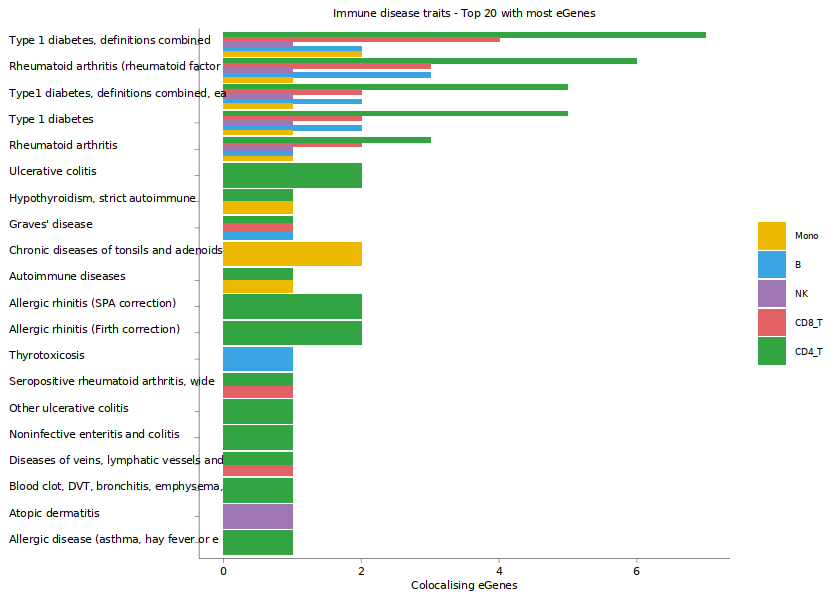

In [610]:
### eGenes
options(repr.plot.width=7, repr.plot.height=5)
study_overview_coloc_eGene = ggplot( summary_per_study_filtered, aes(x=reorder(	gwasTraitFromSource, unique_eGenes.y), y=unique_eGenes.x, fill = cell_type)) + 
    geom_bar(stat = "identity", position = "dodge")  + plot_config + ylab('Colocalising eGenes') + theme(axis.title.y = element_blank(), axis.text.x =element_text(angle = 0)) + cell_type_fill + ggtitle('Immune disease traits - Top 20 with most eGenes') + coord_flip()
study_overview_coloc_eGene

pdf(paste0('figures/G2/G2', 'Colocalising_eGenes_per_trait_immune',   '.pdf'), width =4, height =3)
print(study_overview_coloc_eGene )
dev.off()

pdf 
  2

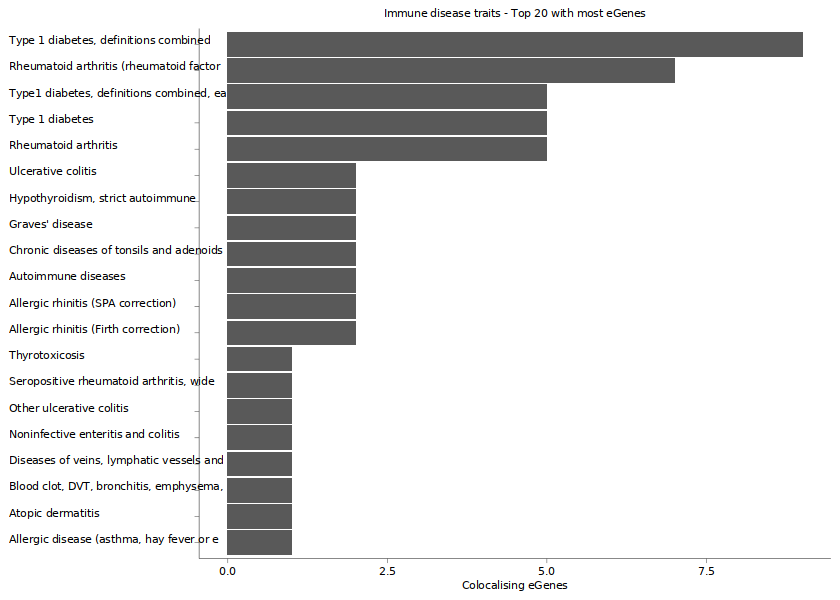

In [611]:
### eGenes across cell-type
### eGenes across cell-type
options(repr.plot.width=7, repr.plot.height=5)
study_overview_coloc_eGene = ggplot(head(summary_per_study_all[,c('gwasTraitFromSource', 'unique_eGenes', 'unique_gene_pairs')] %>% arrange(-unique_eGenes),20) , aes(x=reorder(gwasTraitFromSource, unique_eGenes), y=unique_eGenes)) + 
    geom_bar(stat = "identity", position = "dodge")  + plot_config + ylab('Colocalising eGenes') + theme(axis.title.y = element_blank(), axis.text.x =element_text(angle = 0)) + ggtitle('Immune disease traits - Top 20 with most eGenes') + coord_flip()
study_overview_coloc_eGene

pdf(paste0('figures/G2/G2', 'Colocalising_eGenes_per_trait_immune_all_cell_types',   '.pdf'), width =4, height =3)
print(study_overview_coloc_eGene)
dev.off()

pdf 
  2

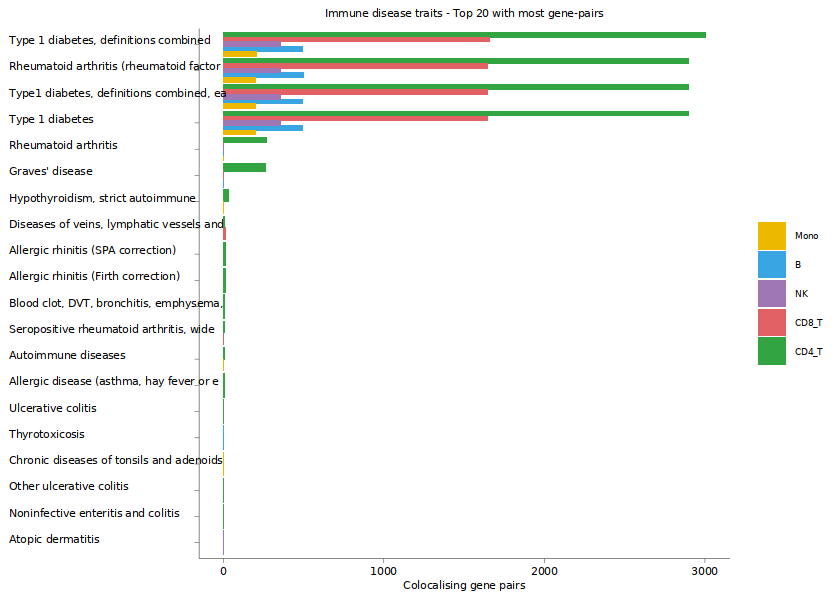

In [612]:
### gene-pairs
### gene-pairs
options(repr.plot.width=7, repr.plot.height=5)
study_overview_coloc_gene_pair = ggplot( summary_per_study_filtered_gene_pair , aes(x=reorder(	gwasTraitFromSource, unique_gene_pairs.y), y=unique_gene_pairs.x, fill = cell_type)) + 
    geom_bar(stat = "identity", position = "dodge")  + plot_config + ylab('Colocalising gene pairs') + theme(axis.title.y = element_blank(), axis.text.x =element_text(angle = 0)) + cell_type_fill+ ggtitle('Immune disease traits - Top 20 with most gene-pairs') + coord_flip()
study_overview_coloc_gene_pair


pdf(paste0('figures/G2/G2', 'Colocalising_gene_pairs_per_trait_immune',   '.pdf'), width =4, height =3)
print(study_overview_coloc_gene_pair)
dev.off()

pdf 
  2

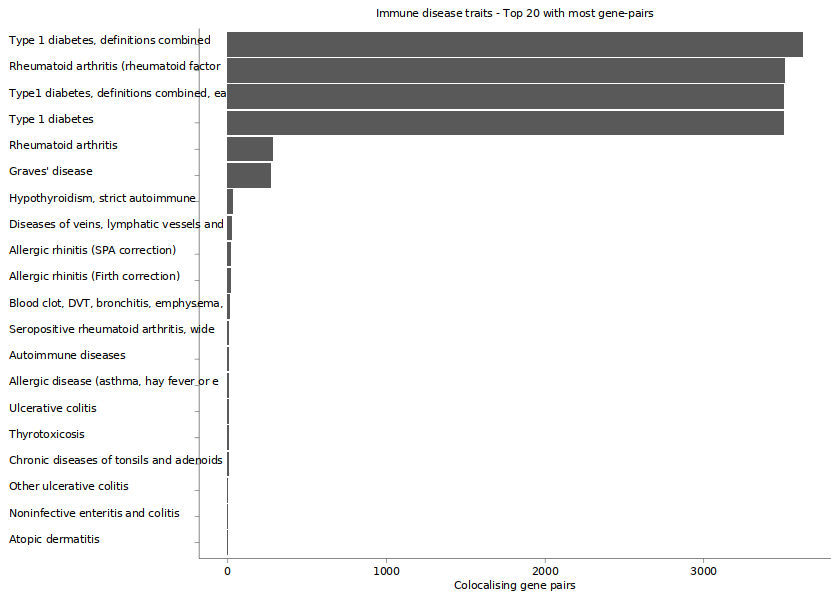

In [613]:
### gene-pairs across cell-type
options(repr.plot.width=7, repr.plot.height=5)
study_overview_coloc_gene_pair = ggplot(head(summary_per_study_all[,c('gwasTraitFromSource', 'unique_eGenes', 'unique_gene_pairs')] %>% arrange(-unique_gene_pairs),20) , aes(x=reorder(gwasTraitFromSource, unique_gene_pairs), y=unique_gene_pairs)) + 
    geom_bar(stat = "identity", position = "dodge")  + plot_config + ylab('Colocalising gene pairs') + theme(axis.title.y = element_blank(), axis.text.x =element_text(angle = 0)) + ggtitle('Immune disease traits - Top 20 with most gene-pairs') + coord_flip()
study_overview_coloc_gene_pair

pdf(paste0('figures/G2/G2', 'Colocalising_gene_pairs_per_trait_immune_all_cell_types',   '.pdf'), width =4, height =3)
print(study_overview_coloc_gene_pair)
dev.off()

## Number of eGenes and gene-pair per Parent term

In [614]:
summary_per_parent_term = coloc_coeqtl %>% group_by( Parent.term, cell_type) %>% summarise(unique_eGenes = length(unique(eGene)),
                                                                                                  unique_gene_pairs = length(unique(gene_pair_fixed)))

`summarise()` has grouped output by 'Parent.term'. You can override using the `.groups` argument.


In [615]:
summary_per_parent_term_all = coloc_coeqtl %>% group_by( Parent.term) %>% summarise(unique_eGenes = length(unique(eGene)),
                                                                                                  unique_gene_pairs = length(unique(gene_pair_fixed)))

In [616]:
summary_per_parent_term$cell_type = factor(summary_per_parent_term$cell_type, levels = c('Mono', 'B', 'NK', 'CD8_T', 'CD4_T'))
#summary_per_parent_term_all$cell_type =  factor(summary_per_parent_term_all$cell_type, levels = c('CD4_T', 'CD8_T', 'NK', 'B', 'Mono'))

In [617]:
write.csv(summary_per_parent_term , 'Parent_Term_data.csv')

In [618]:
### Parent terms with most eGene/ gene-pairs

In [619]:
head(summary_per_parent_term %>% arrange(-unique_gene_pairs),10)

Parent.term,cell_type,unique_eGenes,unique_gene_pairs
<chr>,<fct>,<int>,<int>
Hematological measurement,CD4_T,45,4695
Other measurement,CD4_T,46,4355
Immune system disorder,CD4_T,14,3332
Other disease,CD4_T,17,3213
Lipid or lipoprotein measurement,CD4_T,16,3016
Liver enzyme measurement,CD4_T,12,2983
Biological process,CD4_T,8,2944
Hematological measurement,CD8_T,24,2209
Other measurement,CD8_T,17,1980


In [620]:
head(summary_per_parent_term %>% arrange(-unique_eGenes),10)

Parent.term,cell_type,unique_eGenes,unique_gene_pairs
<chr>,<fct>,<int>,<int>
Other measurement,CD4_T,46,4355
Hematological measurement,CD4_T,45,4695
Hematological measurement,CD8_T,24,2209
Body measurement,CD4_T,18,1094
Body measurement,CD8_T,18,297
Other measurement,Mono,18,785
Other disease,CD4_T,17,3213
Other measurement,CD8_T,17,1980
Lipid or lipoprotein measurement,CD4_T,16,3016


In [621]:
### Plot for parent -terms

pdf 
  2

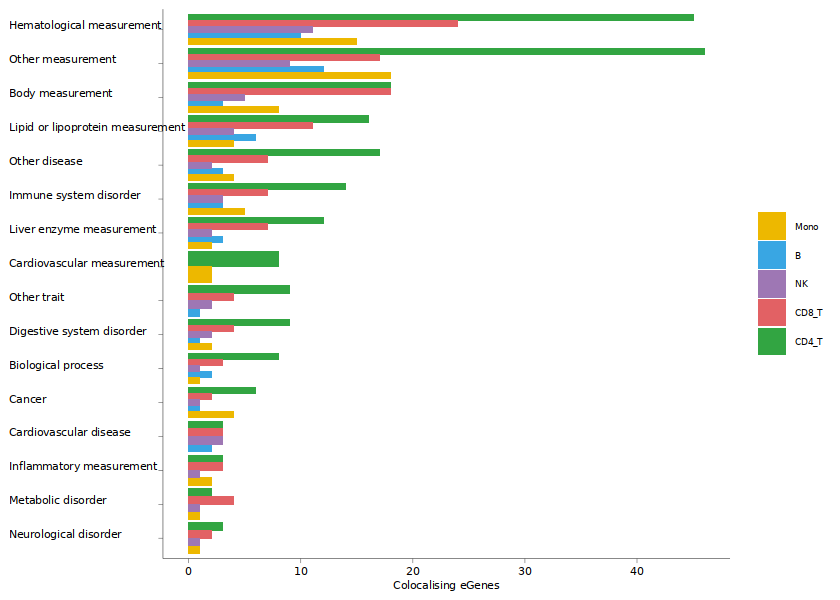

In [622]:
### eGenes
options(repr.plot.width=7, repr.plot.height=5)
parent_term_overview_coloc_eGene = ggplot(summary_per_parent_term[!is.na(summary_per_parent_term$Parent.term),] , aes(x=reorder(Parent.term, unique_eGenes), y=unique_eGenes, fill = cell_type)) + 
    geom_bar(stat = "identity", position = "dodge")  + plot_config + ylab('Colocalising eGenes') + theme(axis.title.y = element_blank(), axis.text.x =element_text(angle = 0)) + cell_type_fill + coord_flip()
parent_term_overview_coloc_eGene

pdf(paste0('figures/G2/G2', 'Colocalising_eGenes_parent_terms',   '.pdf'), width =4, height =3)
print(parent_term_overview_coloc_eGene)
dev.off()

pdf 
  2

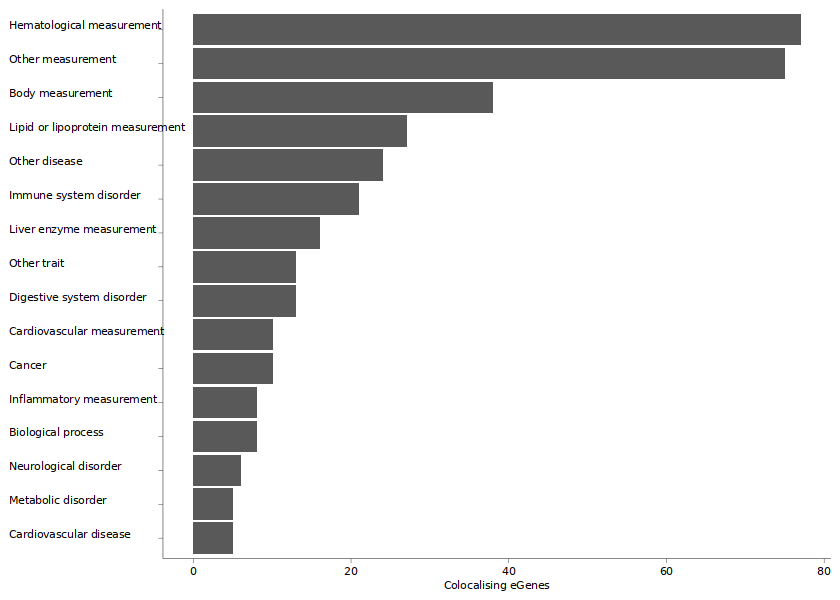

In [623]:
### eGenes across cell-type
options(repr.plot.width=7, repr.plot.height=5)
parent_term_overview_coloc_eGene = ggplot(summary_per_parent_term_all[!is.na(summary_per_parent_term_all$Parent.term),] , aes(x=reorder(Parent.term, unique_eGenes), y=unique_eGenes)) + 
    geom_bar(stat = "identity", position = "dodge")  + plot_config + ylab('Colocalising eGenes') + theme(axis.title.y = element_blank(), axis.text.x =element_text(angle = 0))  + coord_flip()
parent_term_overview_coloc_eGene

pdf(paste0('figures/G2/G2', 'Colocalising_eGenes_parent_terms_across_cell_types',   '.pdf'), width =4, height =3)
print(parent_term_overview_coloc_eGene)
dev.off()

pdf 
  2

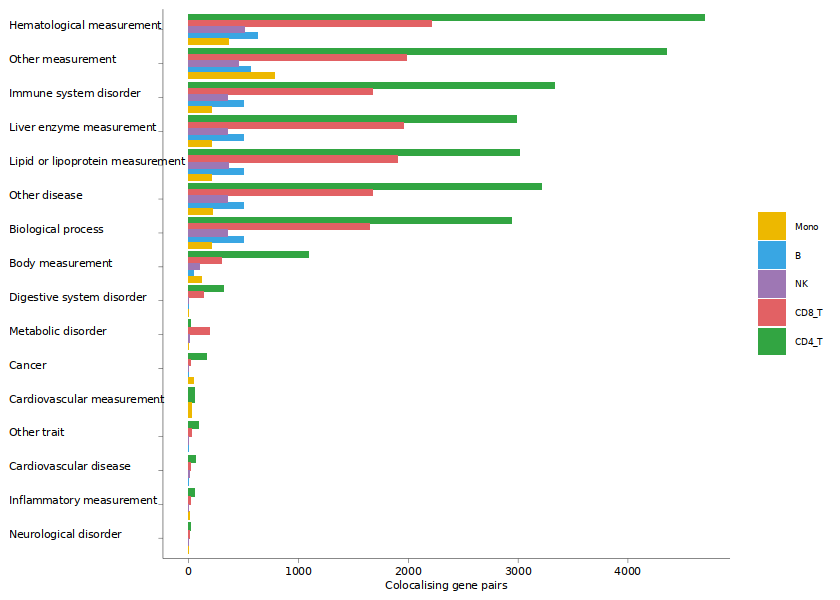

In [624]:
### gene-pairs
options(repr.plot.width=7, repr.plot.height=5)
parent_term_overview_coloc_gene_pair = ggplot(summary_per_parent_term[!is.na(summary_per_parent_term$Parent.term),] , aes(x=reorder(Parent.term, unique_gene_pairs), y=unique_gene_pairs, fill = cell_type)) + 
    geom_bar(stat = "identity", position = "dodge")  + plot_config + ylab('Colocalising gene pairs') + theme(axis.title.y = element_blank(), axis.text.x =element_text(angle = 0)) + cell_type_fill + coord_flip()
parent_term_overview_coloc_gene_pair

pdf(paste0('figures/G2/G2', 'Colocalising_gene_pairs_parent_terms',   '.pdf'), width =4, height =3)
print(parent_term_overview_coloc_gene_pair)
dev.off()


pdf 
  2

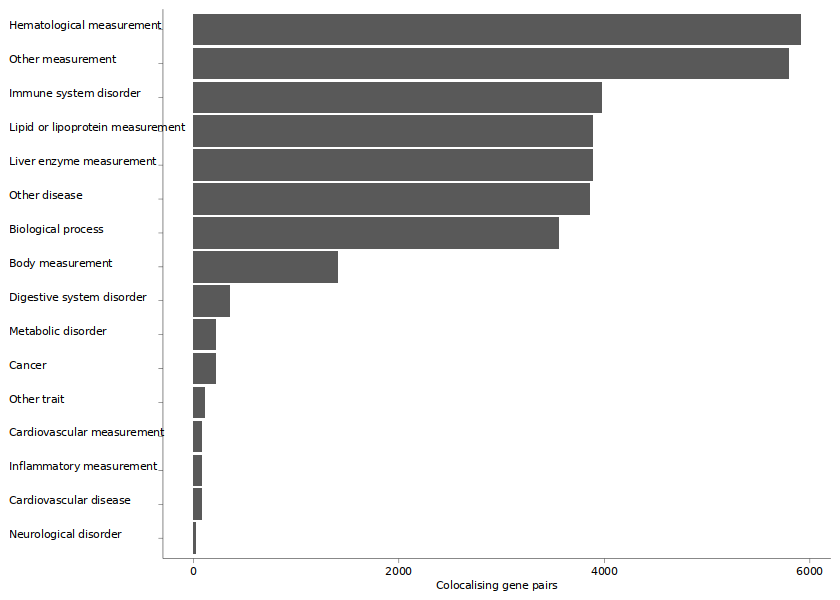

In [625]:
### gene-pairs across cell-type
options(repr.plot.width=7, repr.plot.height=5)
parent_term_overview_coloc_gene_pair  = ggplot(summary_per_parent_term_all[!is.na(summary_per_parent_term_all$Parent.term),] , aes(x=reorder(Parent.term, unique_gene_pairs), y=unique_gene_pairs)) + 
    geom_bar(stat = "identity", position = "dodge")  + plot_config + ylab('Colocalising gene pairs') + theme(axis.title.y = element_blank(), axis.text.x =element_text(angle = 0))  + coord_flip()
parent_term_overview_coloc_gene_pair 

pdf(paste0('figures/G2/G2', 'Colocalising_gene_pairs_parent_terms_across_cell_types',   '.pdf'), width =4, height =3)
print(parent_term_overview_coloc_gene_pair)
dev.off()

# Analyzing overlap of eQTL and co-eQTL colocalizations

In [626]:
### Check how often the same eGenes colocalize in eQTL and co-eQTL coloc (also which eGenes don't colocalize in one of the two)

In [627]:
### eQTL coloc
head(coloc_all[,1:20],2)

,eQTL_CT,eqtlTraitFromSource,SusieRss_CS,snp_id,V1,leftStudyLocusId,leftStudyId,gwasTraitFromSource,gwasEFO,rightStudyLocusId,rightStudyId,chromosome,region,sceqtl_variantId,sceqtl_zScore,sceqtl_pValueMantissa,sceqtl_pValueExponent,leadPIP,sceqtl_log10BF,numberColocalisingVariants
,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>
1,B,ABCA7,1,19:1068739:G:A,2417,6043d21204c01b3366c8ff23ba2d7777,GCST90018965,Mean corpuscular hemoglobin concentration,EFO_0004528,e75be69ed4ec90261856227eda497536,eQTLGen_B_ENSG00000064687,19,19:1040101_1065572,19_1068739_G_A,4.811305,1.499,-6,0.2759724,2.572681,1
2,B,ABHD6,2,3:58339503:A:T,8086,963a59a9d705c67b691d3a4955c92986,GCST90026654,Estimated glomerular filtration rate (creatinine),EFO_0004518,6a498692232d41d4802abcdee28a5018,eQTLGen_B_ENSG00000163686,3,3:58237506_58295693,3_58339503_A_T,-3.359916,7.797,-4,0.1491577,3.106806,11


In [628]:
### coeQTL coloc
head(coloc_coeqtl,2)

,cell_type,gene_pair_fixed,eGene,SusieRss_CS,gwasEFO,snp_id,V1,leftStudyLocusId,leftStudyId,gwasTraitFromSource,⋯,eGene_rib,gwas_disease_class,gwas_immune_class,Parent.term,PP.H4.abf,idx1,rm_cell_count,rb_mt,rb_mt_eGene,rb_mt_coeGene
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<lgl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,B,ABI1_RPS26,RPS26,1,EFO_0009770,12:56007301:G:A,1343,787173a24ef8d3dc4e8b46f2a5a415f7,GCST90092891,Leucine levels,⋯,TRUE,0,0,Other measurement,1,lbf_cs_1,1,1,1,0
2,B,ABI1_RPS26,RPS26,1,EFO_0004612,12:56007301:G:A,1330,bf21098bfe5647bd1f014c444f41b063,GCST90019510,High density lipoprotein cholesterol levels,⋯,TRUE,0,0,Lipid or lipoprotein measurement,1,lbf_cs_1,1,1,1,0


In [629]:
### Study ID's in eQTL and co-eQTL coloc file

In [630]:
length(unique(coloc_all$leftStudyId))
length(unique(coloc_coeqtl$leftStudyId))

[1] 4987

[1] 767

In [631]:
### Merge both files

In [632]:
eGene_coloc_merge = unique(coloc_all[,c('eQTL_CT', 'eqtlTraitFromSource', 'leftStudyId','gwasTraitFromSource', 'h4', 'SusieRss_CS',  'PP.H4.abf', 'ct2', 'idx2')])
coeQTL_coloc_merge = unique(coloc_coeqtl[,c('cell_type', 'eGene', 'gene_pair_fixed', 'leftStudyId', 'gwasTraitFromSource', 'h4','SusieRss_CS', 'PP.H4.abf', 'idx1' )])

In [633]:
eGene_coloc_merge = data.frame(eGene_coloc_merge)

In [634]:
eGene_coloc_merge$eqtl_StudyId = eGene_coloc_merge$leftStudyId
eGene_coloc_merge$leftStudyId = NULL

In [635]:
head(eGene_coloc_merge,2)

,eQTL_CT,eqtlTraitFromSource,gwasTraitFromSource,h4,SusieRss_CS,PP.H4.abf,ct2,idx2,eqtl_StudyId
,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>
1,B,ABCA7,Mean corpuscular hemoglobin concentration,0.9896937,1,NA,NA,NA,GCST90018965
2,B,ABHD6,Estimated glomerular filtration rate (creatinine),0.9909599,2,NA,NA,NA,GCST90026654


In [636]:
unique(eGene_coloc_merge$eQTL_CT)

[1] "B"     "CD4_T" "CD8_T" "Mono"  "NK"

In [639]:
### Get all eGene- gene-pair combinations

In [641]:
egene_gene_pairs = unique(sign_coeqtls[sign_coeqtls$type == 'unique',c('cell_type', 'eGene', 'feature_id')])

In [642]:
head(egene_gene_pairs,1)

,cell_type,eGene,feature_id
,<chr>,<chr>,<chr>
1,CD4_T,A2M,A2M_BACH2


In [643]:
#### Merge coloc information to gene-pairs

In [644]:
### merge EQTL coloc data
combined_data = merge(egene_gene_pairs, eGene_coloc_merge, by.x = c('cell_type', 'eGene'), by.y = c('eQTL_CT', 'eqtlTraitFromSource'), all.x = TRUE)

In [645]:
### merge co-eQTL coloc data
combined_data = merge(combined_data, coeQTL_coloc_merge,  by.x = c('cell_type', 'eGene', 'feature_id'), by.y = c('cell_type', 'eGene', 'gene_pair_fixed'), all.x = TRUE)

In [646]:
head(combined_data,2)

,cell_type,eGene,feature_id,gwasTraitFromSource.x,h4.x,SusieRss_CS.x,PP.H4.abf.x,ct2,idx2,eqtl_StudyId,leftStudyId,gwasTraitFromSource.y,h4.y,SusieRss_CS.y,PP.H4.abf.y,idx1
,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,B,AKAP13,AFF3_AKAP13,Central corneal thickness,0.9675595,2,0.8543633,AKAP13_FOXP1,lbf_cs_2,GCST006367,FINNGEN_R12_I9_CORATHER,Coronary atherosclerosis,0.7877038,1,0.9645106,lbf_cs_1
2,B,AKAP13,AFF3_AKAP13,Central corneal thickness,0.9675595,2,0.8543633,AKAP13_FOXP1,lbf_cs_2,GCST006367,FINNGEN_R12_I9_CABG,Coronary artery bypass grafting,0.7578833,1,0.9645106,lbf_cs_1


In [647]:
### Merge information whether there is a cs for eGene or Gene-pair

In [648]:
head(egene_cs,2)

,X,cell_type,feature_id,SusieRss_CS
,<int>,<chr>,<chr>,<dbl>
1,1,B,A1BG,-Inf
2,2,B,ABCA1,2


In [649]:
egene_cs$X = NULL
colnames(egene_cs) = c('cell_type', 'feature_id', 'SusieRss_CS_eQTL')

In [650]:
combined_data = merge(combined_data, egene_cs, by.x = c('cell_type', 'eGene'), by.y = c('cell_type', 'feature_id'), all.x = TRUE)

In [651]:
head(gene_pairs_cs ,2)

,X,cell_type,eGene,coeGene,feature_id,SusieRss_CS
,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,1,B,AKAP13,AFF3,AFF3_AKAP13,1
2,2,B,AKAP13,FOXP1,AKAP13_FOXP1,3


In [652]:
gene_pairs_cs$X = NULL
colnames(gene_pairs_cs) = c('cell_type', 'eGene', 'coeGene', 'feature_id', 'SusieRss_CS_coeqtl')

In [653]:
head(combined_data,2)

,cell_type,eGene,feature_id,gwasTraitFromSource.x,h4.x,SusieRss_CS.x,PP.H4.abf.x,ct2,idx2,eqtl_StudyId,leftStudyId,gwasTraitFromSource.y,h4.y,SusieRss_CS.y,PP.H4.abf.y,idx1,SusieRss_CS_eQTL
,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,B,AKAP13,AFF3_AKAP13,Central corneal thickness,0.9675595,2,0.8543633,AKAP13_FOXP1,lbf_cs_2,GCST006367,FINNGEN_R12_I9_CORATHER,Coronary atherosclerosis,0.7877038,1,0.9645106,lbf_cs_1,3
2,B,AKAP13,AFF3_AKAP13,Central corneal thickness,0.9675595,2,0.8543633,AKAP13_FOXP1,lbf_cs_2,GCST006367,FINNGEN_R12_I9_CABG,Coronary artery bypass grafting,0.7578833,1,0.9645106,lbf_cs_1,3


In [654]:
combined_data = merge(combined_data,gene_pairs_cs[,c('cell_type', 'feature_id', 'SusieRss_CS_coeqtl' )], by.x = c('cell_type', 'feature_id'), by.y = c('cell_type', 'feature_id'), all.x = TRUE)

In [655]:
head(combined_data,2)

,cell_type,feature_id,eGene,gwasTraitFromSource.x,h4.x,SusieRss_CS.x,PP.H4.abf.x,ct2,idx2,eqtl_StudyId,leftStudyId,gwasTraitFromSource.y,h4.y,SusieRss_CS.y,PP.H4.abf.y,idx1,SusieRss_CS_eQTL,SusieRss_CS_coeqtl
,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>
1,B,ABI1_RPS26,RPS26,Neutrophil percentage of granulocytes,0.9935928,1,1,RPL14_RPS26,lbf_cs_1,GCST004623,GCST90019523,Triglyceride levels,0.9717572,1,1,lbf_cs_1,1,1
2,B,ABI1_RPS26,RPS26,Neutrophil percentage of granulocytes,0.9935928,1,1,RPL14_RPS26,lbf_cs_1,GCST004623,FINNGEN_R12_T1D_EARLY,"Type1 diabetes, definitions combined, early onset",0.9929499,1,1,lbf_cs_1,1,1


In [656]:
combined_data$SusieRss_CS_eQTL[is.na(combined_data$SusieRss_CS_eQTL)] = 0 
combined_data$SusieRss_CS_eQTL[is.infinite(combined_data$SusieRss_CS_eQTL)] = 0 
combined_data$SusieRss_CS_coeqtl[is.na(combined_data$SusieRss_CS_coeqtl)] = 0
combined_data$SusieRss_CS_coeqtl[is.infinite(combined_data$SusieRss_CS_coeqtl)] = 0

In [657]:
unique(combined_data$SusieRss_CS_eQTL)

[1] 1 2 3 4 5 0

In [658]:
unique(combined_data$SusieRss_CS_coeqtl)

[1] 1 0 3 2 4 5

## Analyze at least one colocalization

In [659]:
#Optional filter for at least one matched studie

In [660]:
### 

In [661]:
combined_data$eQTL_coloc = 0
combined_data$eQTL_coloc[!is.na(combined_data$eqtl_StudyId)] = 1


combined_data$coeQTL_coloc = 0
combined_data$coeQTL_coloc[!is.na(combined_data$leftStudyId)] = 1

In [662]:
unique(combined_data$eQTL_coloc)
unique(combined_data$eQTL_coloc)

[1] 1 0

[1] 1 0

In [663]:
## Define variable to check matching colocalisations between eQTL and co-eQTL results

In [664]:
combined_data$matched_coloc = 0
combined_data$matched_coloc[combined_data$eqtl_StudyId == combined_data$leftStudyId] = 1

In [665]:
### Get maximum value per eGene and cell-type

In [667]:
overlaps = combined_data %>% group_by(cell_type, eGene) %>% summarise(
                                                                      eQTL_coloc = max(eQTL_coloc),
                                                                      coeQTL_coloc = max(coeQTL_coloc),
                                                                      matched_coloc = max(matched_coloc),
                                                                      
                                                                      PP.H4.abf.x = max(PP.H4.abf.x),
                                                                      PP.H4.abf.y = max(PP.H4.abf.y),
                                                                      
                                                                      SusieRss_CS_eQTL = max(SusieRss_CS_eQTL),
                                                                      SusieRss_CS_coeqtl = max(SusieRss_CS_coeqtl)
                                                                     
                                                                     )

`summarise()` has grouped output by 'cell_type'. You can override using the `.groups` argument.


In [668]:
head(overlaps,2)

cell_type,eGene,eQTL_coloc,coeQTL_coloc,matched_coloc,PP.H4.abf.x,PP.H4.abf.y,SusieRss_CS_eQTL,SusieRss_CS_coeqtl
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
B,AKAP13,1,1,0,0.85436327,0.9645106,3,3
B,ANXA4,1,0,0,0.01932578,NA,3,1


In [671]:
## Recode Susie CS info: there was a CS or not
overlaps$SusieRss_CS_eQTL[overlaps$SusieRss_CS_eQTL >=1] = 1
overlaps$SusieRss_CS_coeqtl[overlaps$SusieRss_CS_coeqtl >=1] = 1

In [672]:
### Aggregate and count

In [673]:
overlaps_agg = overlaps %>% group_by(matched_coloc, eQTL_coloc, coeQTL_coloc, SusieRss_CS_eQTL,SusieRss_CS_coeqtl,  cell_type) %>% dplyr::count() %>% arrange(cell_type)

In [674]:
overlaps_agg %>% arrange(cell_type, eQTL_coloc + coeQTL_coloc) 

matched_coloc,eQTL_coloc,coeQTL_coloc,SusieRss_CS_eQTL,SusieRss_CS_coeqtl,cell_type,n
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
0,0,0,1,0,B,2
0,0,0,1,1,B,21
0,0,1,0,1,B,1
0,1,0,1,0,B,1
0,1,0,1,1,B,3
0,1,1,1,1,B,1
1,1,1,1,1,B,13
0,0,0,0,0,CD4_T,3
0,0,0,0,1,CD4_T,1


In [2298]:
### Plot the overlaps

In [675]:
## Generate different categories

In [676]:
overlaps_agg$cat = 'no GWAS colocalization'

In [677]:
overlaps_agg$cat[(overlaps_agg$coeQTL_coloc == 1) & (overlaps_agg$eQTL_coloc==0)] = 'only coeqtl GWAS colocalization'

In [678]:
overlaps_agg$cat[(overlaps_agg$coeQTL_coloc == 1) & (overlaps_agg$eQTL_coloc==0) & (overlaps_agg$SusieRss_CS_eQTL == 0)] = 'only coeqtl GWAS colocalization (no eQTL CS)'

In [679]:
overlaps_agg$cat[(overlaps_agg$coeQTL_coloc == 0) & (overlaps_agg$eQTL_coloc==1)] = 'only eqtl GWAS colocalization'
overlaps_agg$cat[(overlaps_agg$coeQTL_coloc == 0) & (overlaps_agg$eQTL_coloc==1) & (overlaps_agg$SusieRss_CS_coeqtl == 0)] = 'only eqtl GWAS colocalization (no coeQTL CS)'

In [680]:
overlaps_agg$cat[(overlaps_agg$coeQTL_coloc ==1) & (overlaps_agg$eQTL_coloc==1)] = 'GWAS colocalization (non matched)'

In [681]:
overlaps_agg$cat[(overlaps_agg$coeQTL_coloc ==1) & (overlaps_agg$eQTL_coloc==1)  & (overlaps_agg$matched_coloc==1)] = 'overlapping GWAS colocalization'

In [682]:
overlaps_agg = overlaps_agg %>% group_by(cat, cell_type) %>% summarise(n = sum(n)) 

`summarise()` has grouped output by 'cat'. You can override using the `.groups` argument.


In [683]:
head(overlaps_agg,2)

cat,cell_type,n
<chr>,<chr>,<int>
GWAS colocalization (non matched),B,1
GWAS colocalization (non matched),CD4_T,6


In [684]:
unique(overlaps_agg$cat)

[1] "GWAS colocalization (non matched)"           
[2] "no GWAS colocalization"                      
[3] "only coeqtl GWAS colocalization"             
[4] "only coeqtl GWAS colocalization (no eQTL CS)"
[5] "only eqtl GWAS colocalization"               
[6] "only eqtl GWAS colocalization (no coeQTL CS)"
[7] "overlapping GWAS colocalization"

In [685]:
overlaps_agg$cat = factor(overlaps_agg$cat, levels = c('no CS','no GWAS colocalization',  
                                                      'only eqtl GWAS colocalization (no coeQTL CS)' , 'only eqtl GWAS colocalization', 
                                                       'only coeqtl GWAS colocalization (no eQTL CS)','only coeqtl GWAS colocalization',
                                                       'GWAS colocalization (non matched)' ,'overlapping GWAS colocalization'))

In [686]:
overlaps_agg$cell_type = factor(overlaps_agg$cell_type, levels = c('CD4_T', 'CD8_T', 'NK', 'B', 'Mono'))

In [687]:
overlaps_agg %>% group_by(cat) %>% summarise(sum = sum(n))

cat,sum
<fct>,<int>
no GWAS colocalization,168
only eqtl GWAS colocalization (no coeQTL CS),9
only eqtl GWAS colocalization,38
only coeqtl GWAS colocalization (no eQTL CS),5
only coeqtl GWAS colocalization,28
GWAS colocalization (non matched),14
overlapping GWAS colocalization,136


pdf 
  2

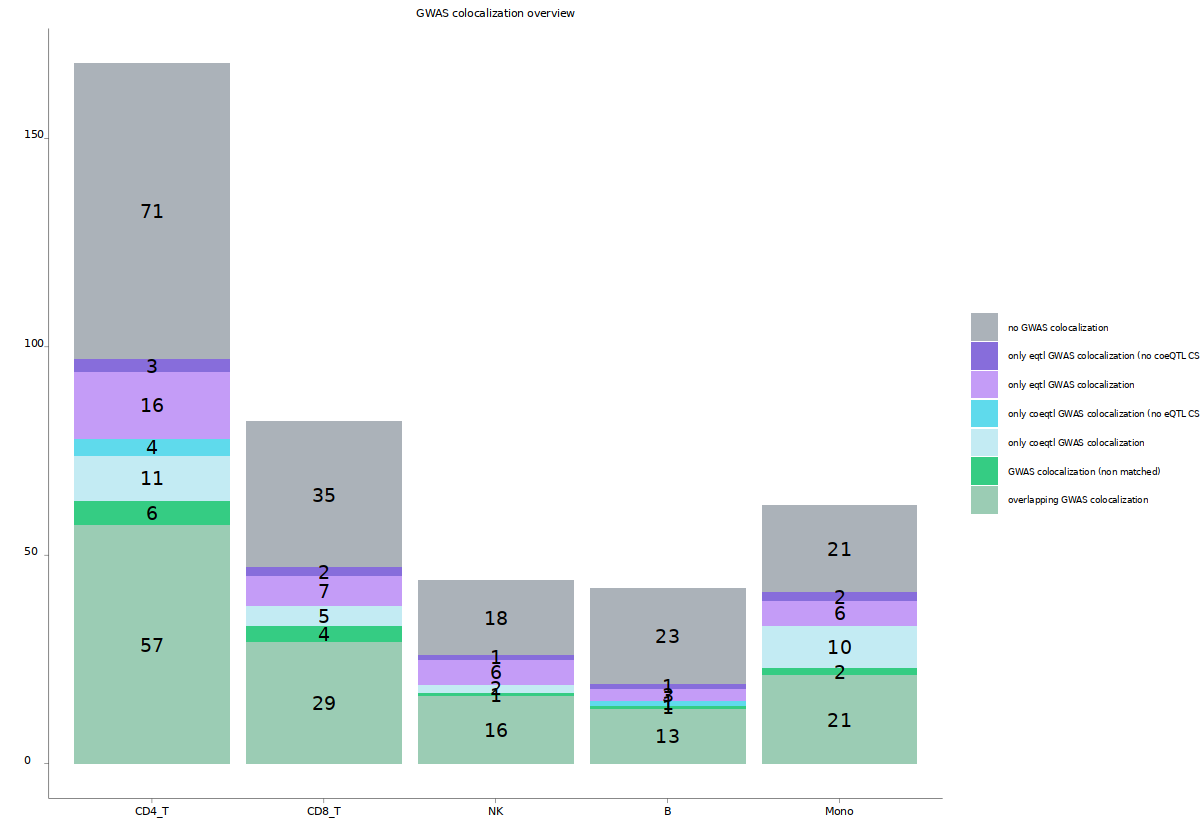

In [688]:
options(repr.plot.width=10, repr.plot.height=7)
bar_chart = ggplot(overlaps_agg, aes(fill=cat, y=n, x=cell_type)) + 
    geom_bar(position="stack", stat="identity") + plot_config  +
    geom_text(aes(label =n),  position = position_stack(vjust = 0.5), size = 4, color = "black") + xlab('') + ylab('')+ ggtitle('GWAS colocalization overview') +  
     scale_fill_manual(values = c( 'no GWAS colocalization' = "#abb2b9", 
                                  'only coeqtl GWAS colocalization' =  "#c3ebf3",
                                  'only coeqtl GWAS colocalization (no eQTL CS)' ="#5fdaec", 
                                  'only eqtl GWAS colocalization' =   "#c49cf7",  
                                   'only eqtl GWAS colocalization (no coeQTL CS)' =  "#876ddb",
                                   'no CS' =  "#cc3553",
                                   'overlapping GWAS colocalization' =  "#9bccb4",
                                  'GWAS colocalization (non matched)' =  "#35cc83"
                                 ))  # custom colors
  


print(bar_chart)

pdf(paste0('figures/G2/G2_',  'Bar_Chart_Coloc_Overview' ,  '.pdf'), width = 8, height =3)
print(bar_chart )
dev.off()

In [689]:
### Get the examples (of overlapping/ non overlapping categories)

In [691]:
only_coeqtl_coloc = overlaps[(overlaps$eQTL_coloc == 0) & (overlaps$coeQTL_coloc == 1),]

In [692]:
nrow(only_coeqtl_coloc )

[1] 33

In [693]:
head(only_coeqtl_coloc ,2)

cell_type,eGene,eQTL_coloc,coeQTL_coloc,matched_coloc,PP.H4.abf.x,PP.H4.abf.y,SusieRss_CS_eQTL,SusieRss_CS_coeqtl
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
B,IGHG2,0,1,0,NA,NA,0,1
CD4_T,CCDC167,0,1,0,NA,0.995096,1,1


In [694]:
### Merge the disease traits to only co-eQTL coloc examples (in case of cell-type related trait not merge!)

In [695]:
eGene_traits = unique(coloc_coeqtl[,c('eGene', 'gwas_disease_class', 'gwasTraitFromSource', 'cell_type')]) %>% dplyr::filter(gwas_disease_class == 1) %>%  group_by(eGene, cell_type) %>% summarise(
    gwasTraitFromSource = paste0(gwasTraitFromSource, collapse = ';'))

`summarise()` has grouped output by 'eGene'. You can override using the `.groups` argument.


In [696]:
only_coeqtl_coloc = merge(only_coeqtl_coloc, eGene_traits, all.x = TRUE)

In [697]:
### Investigate cases with only co-eQTL colocalization

In [699]:
only_coeqtl_coloc[!is.na(only_coeqtl_coloc$gwasTraitFromSource),]

,cell_type,eGene,eQTL_coloc,coeQTL_coloc,matched_coloc,PP.H4.abf.x,PP.H4.abf.y,SusieRss_CS_eQTL,SusieRss_CS_coeqtl,gwasTraitFromSource
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
6,CD4_T,IL7R,0,1,0,NA,0.1804065925,1,1,Dermatitis
10,CD4_T,RPL36AL,0,1,0,NA,NA,1,1,"Hypothyroidism or myxoedema (SPA correction);Hypothyroidism or myxoedema (Firth correction);Type 1 diabetes;Rheumatoid arthritis (rheumatoid factor and/or anti-cyclic citrullinated peptide seropositive);Type 1 diabetes, definitions combined;Asthma/COPD (KELA code 203);Disorders of the thyroid gland;Type1 diabetes, definitions combined, early onset;Asthma (only as main-diagnosis) (more control exclusions)"
11,CD4_T,SH3YL1,0,1,0,NA,NA,0,1,"Type1 diabetes, definitions combined, early onset;Asthma (only as main-diagnosis) (more control exclusions);Hypothyroidism or myxoedema (SPA correction);Hypothyroidism or myxoedema (Firth correction);Disorders of the thyroid gland;Rheumatoid arthritis (rheumatoid factor and/or anti-cyclic citrullinated peptide seropositive);Asthma/COPD (KELA code 203);Type 1 diabetes, definitions combined;Type 1 diabetes"
12,CD4_T,SNHG8,0,1,0,NA,NA,1,1,"Rheumatoid arthritis (rheumatoid factor and/or anti-cyclic citrullinated peptide seropositive);Asthma (only as main-diagnosis) (more control exclusions);Asthma/COPD (KELA code 203);Hypothyroidism or myxoedema (Firth correction);Type 1 diabetes, definitions combined;Type 1 diabetes;Disorders of the thyroid gland;Type1 diabetes, definitions combined, early onset;Hypothyroidism or myxoedema (SPA correction)"
15,CD4_T,UBE2E2,0,1,0,NA,0.8425769608,1,1,"Respiratory disease (confirmatory factor analysis Factor 11);Allergic rhinitis (Firth correction);Blood clot, DVT, bronchitis, emphysema, asthma, rhinitis, eczema, allergy diagnosed by doctor: PHESANT recoding (UKB data field 6152_100);Allergic rhinitis (SPA correction)"
17,CD8_T,GNLY,0,1,0,NA,NA,1,1,Metabolic syndrome
21,CD8_T,TSPAN32,0,1,0,NA,NA,1,1,"Type 2 diabetes, wide definition"
27,Mono,LGALS2,0,1,0,NA,NA,1,1,Other disorders of ear;Hearing difficulty/problems: Yes (UKB data field 2247_1);Sensorineural hearing loss
28,Mono,LINC00937,0,1,0,NA,0.0001108492,1,1,"Type 1 diabetes, definitions combined"


In [281]:
# Save the examples for checking!

In [282]:
write.csv(only_coeqtl_coloc, paste0('examples/Only_coeqtl_coloc_overlapped_traits.csv'))

In [700]:
### Check the only eQTL examples

In [703]:
only_eqtl_coloc = overlaps[(overlaps$eQTL_coloc == 1) & (overlaps$coeQTL_coloc == 0),]

In [704]:
nrow(only_eqtl_coloc)

[1] 47

In [706]:
head(only_eqtl_coloc %>% arrange(-PP.H4.abf.x),10)    # in most of the cases the co-eQTL colocalizes with a different CS of the eQTL than the one that colocalizes with disease

cell_type,eGene,eQTL_coloc,coeQTL_coloc,matched_coloc,PP.H4.abf.x,PP.H4.abf.y,SusieRss_CS_eQTL,SusieRss_CS_coeqtl
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mono,PRKCB,1,0,0,0.875886140,NA,1,1
CD4_T,SEMA4D,1,0,0,0.564693096,NA,1,1
CD4_T,CDC42,1,0,0,0.089512815,NA,1,1
B,ANXA4,1,0,0,0.019325779,NA,1,1
CD4_T,IL32,1,0,0,0.014217574,NA,1,1
CD8_T,FAM118A,1,0,0,0.010262877,NA,1,1
Mono,LYZ,1,0,0,0.007016910,NA,1,1
CD8_T,PLCL1,1,0,0,0.005028646,NA,1,1
NK,CD3E,1,0,0,0.004909262,NA,1,1


In [707]:
# Save the examples!

In [708]:
write.csv(only_eqtl_coloc , paste0('examples/Only_eqtl_coloc_overlapped_traits.csv'))

## Analyze percentage of co_eGenes per eGene that colocalize

In [709]:
### Check across all traits

In [710]:
head(combined_data,2)

,cell_type,feature_id,eGene,gwasTraitFromSource.x,h4.x,SusieRss_CS.x,PP.H4.abf.x,ct2,idx2,eqtl_StudyId,⋯,gwasTraitFromSource.y,h4.y,SusieRss_CS.y,PP.H4.abf.y,idx1,SusieRss_CS_eQTL,SusieRss_CS_coeqtl,eQTL_coloc,coeQTL_coloc,matched_coloc
,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,B,ABI1_RPS26,RPS26,Neutrophil percentage of granulocytes,0.9935928,1,1,RPL14_RPS26,lbf_cs_1,GCST004623,⋯,Triglyceride levels,0.9717572,1,1,lbf_cs_1,1,1,1,1,0
2,B,ABI1_RPS26,RPS26,Neutrophil percentage of granulocytes,0.9935928,1,1,RPL14_RPS26,lbf_cs_1,GCST004623,⋯,"Type1 diabetes, definitions combined, early onset",0.9929499,1,1,lbf_cs_1,1,1,1,1,0


In [713]:
combined_data_gene_pair_level = combined_data %>% group_by(cell_type, eGene, feature_id) %>% summarise(
                                                                                                       matched_coloc = max(matched_coloc))

`summarise()` has grouped output by 'cell_type', 'eGene'. You can override using the `.groups`
argument.


In [714]:
head(combined_data_gene_pair_level,2)

cell_type,eGene,feature_id,matched_coloc
<chr>,<chr>,<chr>,<dbl>
B,AKAP13,AFF3_AKAP13,0
B,AKAP13,AKAP13_FOXP1,0


In [715]:
### Per eGene get amount of co-eGenes with matched coloc

In [716]:
combined_data_gene_pair_level_overview = combined_data_gene_pair_level %>% group_by(cell_type, eGene, matched_coloc) %>% dplyr::count()

In [717]:
combined_data_gene_pair_level_overview  = combined_data_gene_pair_level_overview  %>% group_by(cell_type, eGene) %>% mutate(total_amount_coeGenes = sum(n))

In [718]:
## Calculate percentage of co-eGenes colocalising with same trait
combined_data_gene_pair_level_overview$percentage_coeGenes = combined_data_gene_pair_level_overview$n / combined_data_gene_pair_level_overview$total_amount_coeGenes

In [719]:
combined_data_gene_pair_level[(combined_data_gene_pair_level$eGene == 'GSTP1') & (combined_data_gene_pair_level$cell_type == 'Mono') &
                              (combined_data_gene_pair_level$matched_coloc == 0),]

cell_type,eGene,feature_id,matched_coloc
<chr>,<chr>,<chr>,<dbl>
Mono,GSTP1,GSTP1_JAML,0
Mono,GSTP1,GSTP1_NRGN,0
Mono,GSTP1,GSTP1_SMIM25,0
Mono,GSTP1,GSTP1_SNAPC3,0
Mono,GSTP1,GSTP1_TGIF1,0


In [720]:
### Get example with differences among co-eGenes
examples_coeGene_diff = combined_data_gene_pair_level_overview[(combined_data_gene_pair_level_overview$percentage_coeGenes != 0) & (combined_data_gene_pair_level_overview$percentage_coeGenes != 1),]

In [723]:
#examples_coeGene_diff[(examples_coeGene_diff$matched_coloc == 1) & (examples_coeGene_diff$percentage_coeGenes > 0.1) & (examples_coeGene_diff$percentage_coeGenes < 0.9),]

In [724]:
### calculate amount of co-eGenes per eGene
amount_coegenes = combined_data %>% group_by(cell_type, eGene) %>% summarise(amount_coegenes = length(unique(feature_id)))

`summarise()` has grouped output by 'cell_type'. You can override using the `.groups` argument.


In [725]:
combined_data_gene_pair_level_trait = combined_data %>% dplyr::filter(matched_coloc == 1)

In [726]:
head(combined_data_gene_pair_level_trait,2)

,cell_type,feature_id,eGene,gwasTraitFromSource.x,h4.x,SusieRss_CS.x,PP.H4.abf.x,ct2,idx2,eqtl_StudyId,⋯,gwasTraitFromSource.y,h4.y,SusieRss_CS.y,PP.H4.abf.y,idx1,SusieRss_CS_eQTL,SusieRss_CS_coeqtl,eQTL_coloc,coeQTL_coloc,matched_coloc
,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,B,ABI1_RPS26,RPS26,Sum eosinophil basophil counts,0.8688086,1,1,RPL14_RPS26,lbf_cs_1,GCST004624,⋯,Sum eosinophil basophil counts,0.8688086,1,1,lbf_cs_1,1,1,1,1,1
2,B,ABI1_RPS26,RPS26,Neutrophil percentage of granulocytes,0.9935928,1,1,RPL14_RPS26,lbf_cs_1,GCST004623,⋯,Neutrophil percentage of granulocytes,0.9935928,1,1,lbf_cs_1,1,1,1,1,1


In [727]:
## Add the names of the traits

In [728]:
combined_data_gene_pair_level_trait = merge(combined_data_gene_pair_level_trait, unique(coloc_coeqtl[,c('gwasTraitFromSource', 'leftStudyId')]), all.x = TRUE, by = 'leftStudyId')

In [729]:
head(combined_data_gene_pair_level_trait ,2)

,leftStudyId,cell_type,feature_id,eGene,gwasTraitFromSource.x,h4.x,SusieRss_CS.x,PP.H4.abf.x,ct2,idx2,⋯,h4.y,SusieRss_CS.y,PP.H4.abf.y,idx1,SusieRss_CS_eQTL,SusieRss_CS_coeqtl,eQTL_coloc,coeQTL_coloc,matched_coloc,gwasTraitFromSource
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,⋯,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,FINNGEN_R12_AB1_ERYSIPELAS,CD4_T,RPL7A_TUFM,TUFM,Erysipelas,0.8580112,1,0.9946806,RPSA_TUFM,lbf_cs_1,⋯,0.8729399,1,0.9946806,lbf_cs_1,4,1,1,1,1,Erysipelas
2,FINNGEN_R12_AB1_ERYSIPELAS,CD4_T,RPSA_TUFM,TUFM,Erysipelas,0.9664918,4,0.8298278,HNRNPA1_TUFM,lbf_cs_1,⋯,0.8729399,1,0.9946806,lbf_cs_1,4,1,1,1,1,Erysipelas


In [730]:
#### Amount of co-eGenes per Trait/ study , eGene and coeGene

In [731]:
amount_coloc_coegenes = combined_data_gene_pair_level_trait %>% group_by(cell_type, eGene,leftStudyId, gwasTraitFromSource) %>% summarise(amount_coegenes_coloc = length(unique(feature_id)))

`summarise()` has grouped output by 'cell_type', 'eGene', 'leftStudyId'. You can override using the
`.groups` argument.


In [732]:
head(amount_coloc_coegenes ,2)

cell_type,eGene,leftStudyId,gwasTraitFromSource,amount_coegenes_coloc
<chr>,<chr>,<chr>,<chr>,<int>
B,AP1S3,GCST90267986,Cystatin C production,4
B,CDK13,GCST90002389,Lymphocyte percentage of white cells,5


In [733]:
### Merge the total amount of co-eGenes

In [734]:
nrow(amount_coloc_coegenes)
amount_coloc_coegenes = merge(amount_coloc_coegenes, amount_coegenes, by = c('cell_type', 'eGene'), all.x = TRUE)
nrow(amount_coloc_coegenes)

[1] 1221

[1] 1221

In [735]:
### Calculate percentage per trati

In [736]:
amount_coloc_coegenes$percentage = amount_coloc_coegenes$amount_coegenes_coloc / amount_coloc_coegenes$amount_coegenes

In [737]:
amount_coloc_coegenes[(amount_coloc_coegenes$percentage < 0.8) & (amount_coloc_coegenes$percentage > 0.2) & (is.na(str_extract(amount_coloc_coegenes$gwasTraitFromSource, 'count'))) & (amount_coloc_coegenes$amount_coegenes_coloc >2 ),] %>% arrange(percentage)

cell_type,eGene,leftStudyId,gwasTraitFromSource,amount_coegenes_coloc,amount_coegenes,percentage
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>
CD4_T,RNASET2,GCST90018860,Hyperthyroidism,56,265,0.2113208
NK,AK5,GCST90018739,Height,4,15,0.2666667
NK,AK5,GCST90278664,Height,4,15,0.2666667
Mono,VPS53,GCST012227,Hip circumference adjusted for BMI,8,28,0.2857143
Mono,VPS53,GCST012229,Hip index,8,28,0.2857143
Mono,VPS53,GCST90014021,Hip circumference (UKB data field 49),8,28,0.2857143
CD4_T,PPWD1,GCST006952,Feeling tense,3,10,0.3000000
CD4_T,PPWD1,GCST90041881,Tense / highly strung (UKB data field 1990),3,10,0.3000000
CD4_T,PPWD1,GCST90271701,"12-item EPQ-R neuroticism questionnaire- responded """"""""""""""""""""""""""""""""yes"""""""""""""""""""""""""""""""" to """"""""""""""""""""""""""""""""Would you call yourself tense or 'highly strung'?"""""""""""""""""""""""""""""""" (UKB data field 1990)",3,10,0.3000000
